In [138]:

#import necessary packages
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
#from pandas_datareader import data
import fix_yahoo_finance as yf


# Generar trayectorias para dos instrumentos

In [139]:
n_años=10
S = 100 #starting stock price (i.e. last available real stock price)
T = 365*n_años #Number of trading days
mu = 0.09 #Return
vol = 0.16 #Volatility
 
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
 
#set starting price and create price series generated by above random daily returns
price_list2 = [S]
 
for x in daily_returns:
    price_list2.append(price_list2[-1]*x)
 
#Generate Plots - price series and histogram of daily returns
#plt.plot(daily_returns)
#plt.show()
#plt.plot(price_list2)
#plt.show()
#plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
#plt.show()

In [140]:
n_años=10
S = 100 #starting stock price (i.e. last available real stock price)
T = 365*n_años #Number of trading days
mu = 0.04 #Return
vol = 0.01 #Volatility
 
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
 
#set starting price and create price series generated by above random daily returns
price_list1 = [S]
 
for x in daily_returns:
    price_list1.append(price_list1[-1]*x)
 
#Generate Plots - price series and histogram of daily returns
#plt.plot(daily_returns)
#plt.show()
#plt.plot(price_list1)
#plt.show()
#plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
#plt.show()

In [375]:
def get_return(df):
    df1=df.pct_change()
    return df1

def get_return_cum(df):
    returns=get_return(df)
    cum_returns = (1 + returns).cumprod()
    return cum_returns

def get_return_annual(df):
    annual_return_=df.asfreq("D").ffill().asfreq("BAS-JAN").pct_change() # BY: Business year  #asfreq('BY')   #asfreq("BAS-JAN").ffill()
    return annual_return_
    
def get_roll_drawdown(df):
    Roll_Max = pd.DataFrame(df.values-np.maximum.accumulate(df.values))
    Roll_Max.index=df.index
    Roll_Max.columns=df.columns
    return Roll_Max

# calculates max drawdown, largest reduction from highest point
def max_drawdown(xs):
    i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
    j = np.argmax(xs[:i]) # start of period
    pct_mdd = -1 * ((xs[j] - xs[i]) / xs[j])
    return pct_mdd, j, i

# plots max drawdown chart
def plot_max_drawdown(xs):
    _, j, i = max_drawdown(xs)
    plt.plot(xs)
    plt.legend()
    plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=5)

In [335]:
idx=pd.date_range('2000-01-01', '2018-07-19', freq="B")

instrument_A=pd.DataFrame(price_list1)#.plot()
instrument_A.columns=["A"]
instrument_A.index=idx[:len(instrument_A)]

instrument_B=pd.DataFrame(price_list2)#.plot()
instrument_B.columns=["B"]
instrument_B.index=idx[:len(instrument_B)]


In [6]:
#Roll_Max_A

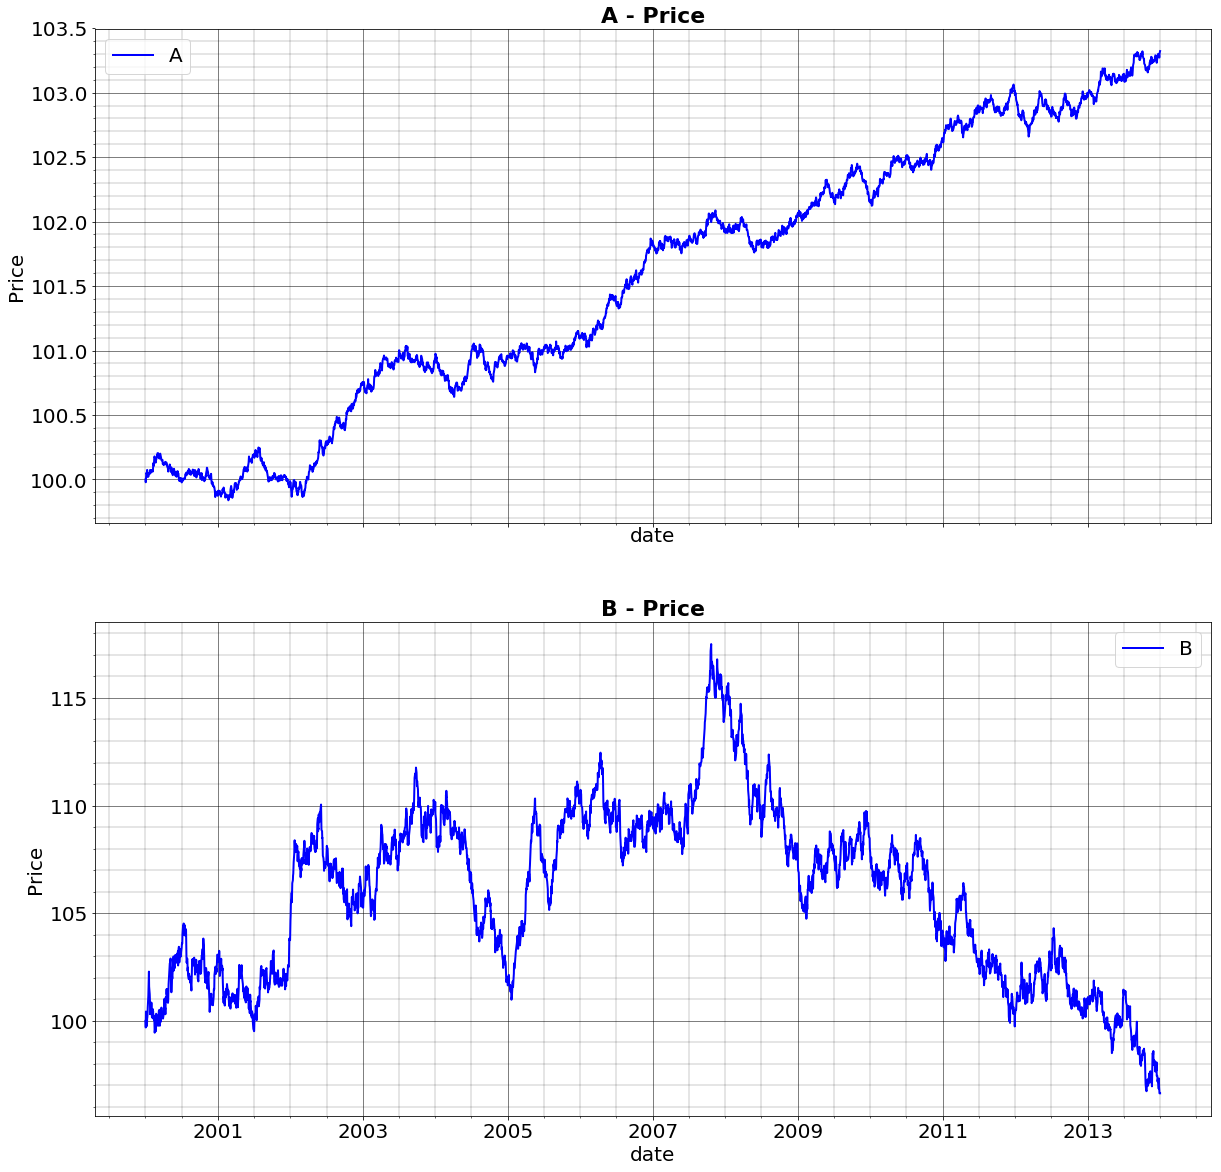

In [143]:
import matplotlib.pyplot as plt
f, (ax1) = plt.subplots(2,1, sharex=True, figsize=(20,20))
#f.suptitle(ticker+' : '+str(date_now),y=1.05, fontsize=25) #  "2018 - 07 - 11"

ax1[0].plot(instrument_A,color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[0].set_xlabel('date' ,fontsize=20)
ax1[0].set_ylabel('Price' ,fontsize=20)
ax1[0].set_title( instrument_A.columns[0]+' - Price',fontsize=22, fontweight='bold')
ax1[0].tick_params(labelsize = 20)
ax1[0].legend( fontsize=20,loc='best')#shadow=True,
ax1[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[0].minorticks_on()

ax1[1].plot(instrument_B,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[1].set_xlabel('date' ,fontsize=20)
ax1[1].set_ylabel('Price' ,fontsize=20)
ax1[1].set_title( instrument_B.columns[0]+' - Price',fontsize=22, fontweight='bold')
ax1[1].tick_params(labelsize = 20)
ax1[1].legend( fontsize=20,loc='best')#shadow=True,
ax1[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[1].minorticks_on()


In [8]:
#cum_returns_A

# PORTAFOLIO

# 1. BUY AND HOLD

In [336]:
I=1000 # Capital
w_a=.9 # weight A
w_b=round(1-w_a,2)

In [415]:
## suponiendo reebalnaceo diario de inversion inicial de 1000 con w_a y w_b

prices=pd.concat([instrument_A,instrument_B],axis=1)
prices.columns=["A_price","B_price"]
prices.head()
aux=get_return(prices)#pd.DataFrame(prices.pct_change())#()
#aux.colums=["A_returns","B_returns"]
aux1=get_return_cum(prices)#pd.DataFrame((prices.pct_change()+1).cumprod())#(prices.pct_change()+1).cumprod())
aux2=get_return_annual(prices)
aux3=get_roll_drawdown(prices)
prices=pd.concat([prices,aux,aux1,aux3],axis=1)
prices=pd.merge(prices,aux2,left_index=True,right_index=True,how="left")
prices.columns=["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return",
               "A_maxd","B_maxd","A_ann_return","B_ann_return"]
prices["A_returns_1"]=prices["A_returns"]+1
prices["B_returns_1"]=prices["B_returns"]+1
prices["A_wa"]=prices["A_cum_return"]*w_a
prices["B_wb"]=prices["B_cum_return"]*w_b
prices["Portfolio_evolution"]=(prices["A_wa"]+prices["B_wb"])*I
prices["Portfolio_evolution"]=prices["Portfolio_evolution"].fillna(1000)
portfolio=pd.DataFrame(prices["Portfolio_evolution"])
portfolio.columns=["Portfolio"]

prices["Port_returns"]=get_return(portfolio)
prices["Port_cum_return"]= get_return_cum(portfolio)
prices["Port_ann_return"]=get_return_annual(portfolio)
prices["Port_maxd"]=get_roll_drawdown(portfolio.dropna())
prices.head()

A_price     B_price  A_returns  B_returns  A_cum_return  \
2000-01-03  100.000000  100.000000        NaN        NaN           NaN   
2000-01-04   99.978111   99.692963  -0.000219  -0.003070      0.999781   
2000-01-05  100.005187  100.433251   0.000271   0.007426      1.000052   
2000-01-06  100.041193  100.328317   0.000360  -0.001045      1.000412   
2000-01-07  100.051568  100.267796   0.000104  -0.000603      1.000516   

            B_cum_return    A_maxd    B_maxd  A_ann_return  B_ann_return  \
2000-01-03           NaN  0.000000  0.000000           NaN           NaN   
2000-01-04      0.996930 -0.021889 -0.307037           NaN           NaN   
2000-01-05      1.004333  0.000000  0.000000           NaN           NaN   
2000-01-06      1.003283  0.000000 -0.104934           NaN           NaN   
2000-01-07      1.002678  0.000000 -0.165454           NaN           NaN   

            A_returns_1  B_returns_1      A_wa      B_wb  Portfolio_evolution  \
2000-01-03          NaN          NaN       NaN       NaN          1000.000000   
2000-01-04     0.999781     0.996930  0.899803  0.099693           999.495966   
2000-01-05     1.000271     1.007426  0.900047  0.100433          1000.479938   
2000-01-06     1.000360     0.998955  0.900371  0.100328          1000.699057   
2000-01-07     1.000104     0.999397  0.900464  0.100268          1000.731909   

            Port_returns  Port_cum_return  Port_ann_return  Port_maxd  
2000-01-03           NaN              NaN              NaN   0.000000  
2000-01-04     -0.000504         0.999496              NaN  -0.504034  
2000-01-05      0.000984         1.000480              NaN   0.000000  
2000-01-06      0.000219         1.000699              NaN   0.000000  
2000-01-07      0.000033         1.000732              NaN   0.000000

In [414]:
#prices["Port_ann_return"].drop_duplicates()

In [12]:
#print(prices["Port_ann_return"].dropna().T)

/home/ubuntu/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Retorno de Portfolio: 2.65
Drawdown Portfolio: -12.27
# años con retornos anuales positivos : 11/14


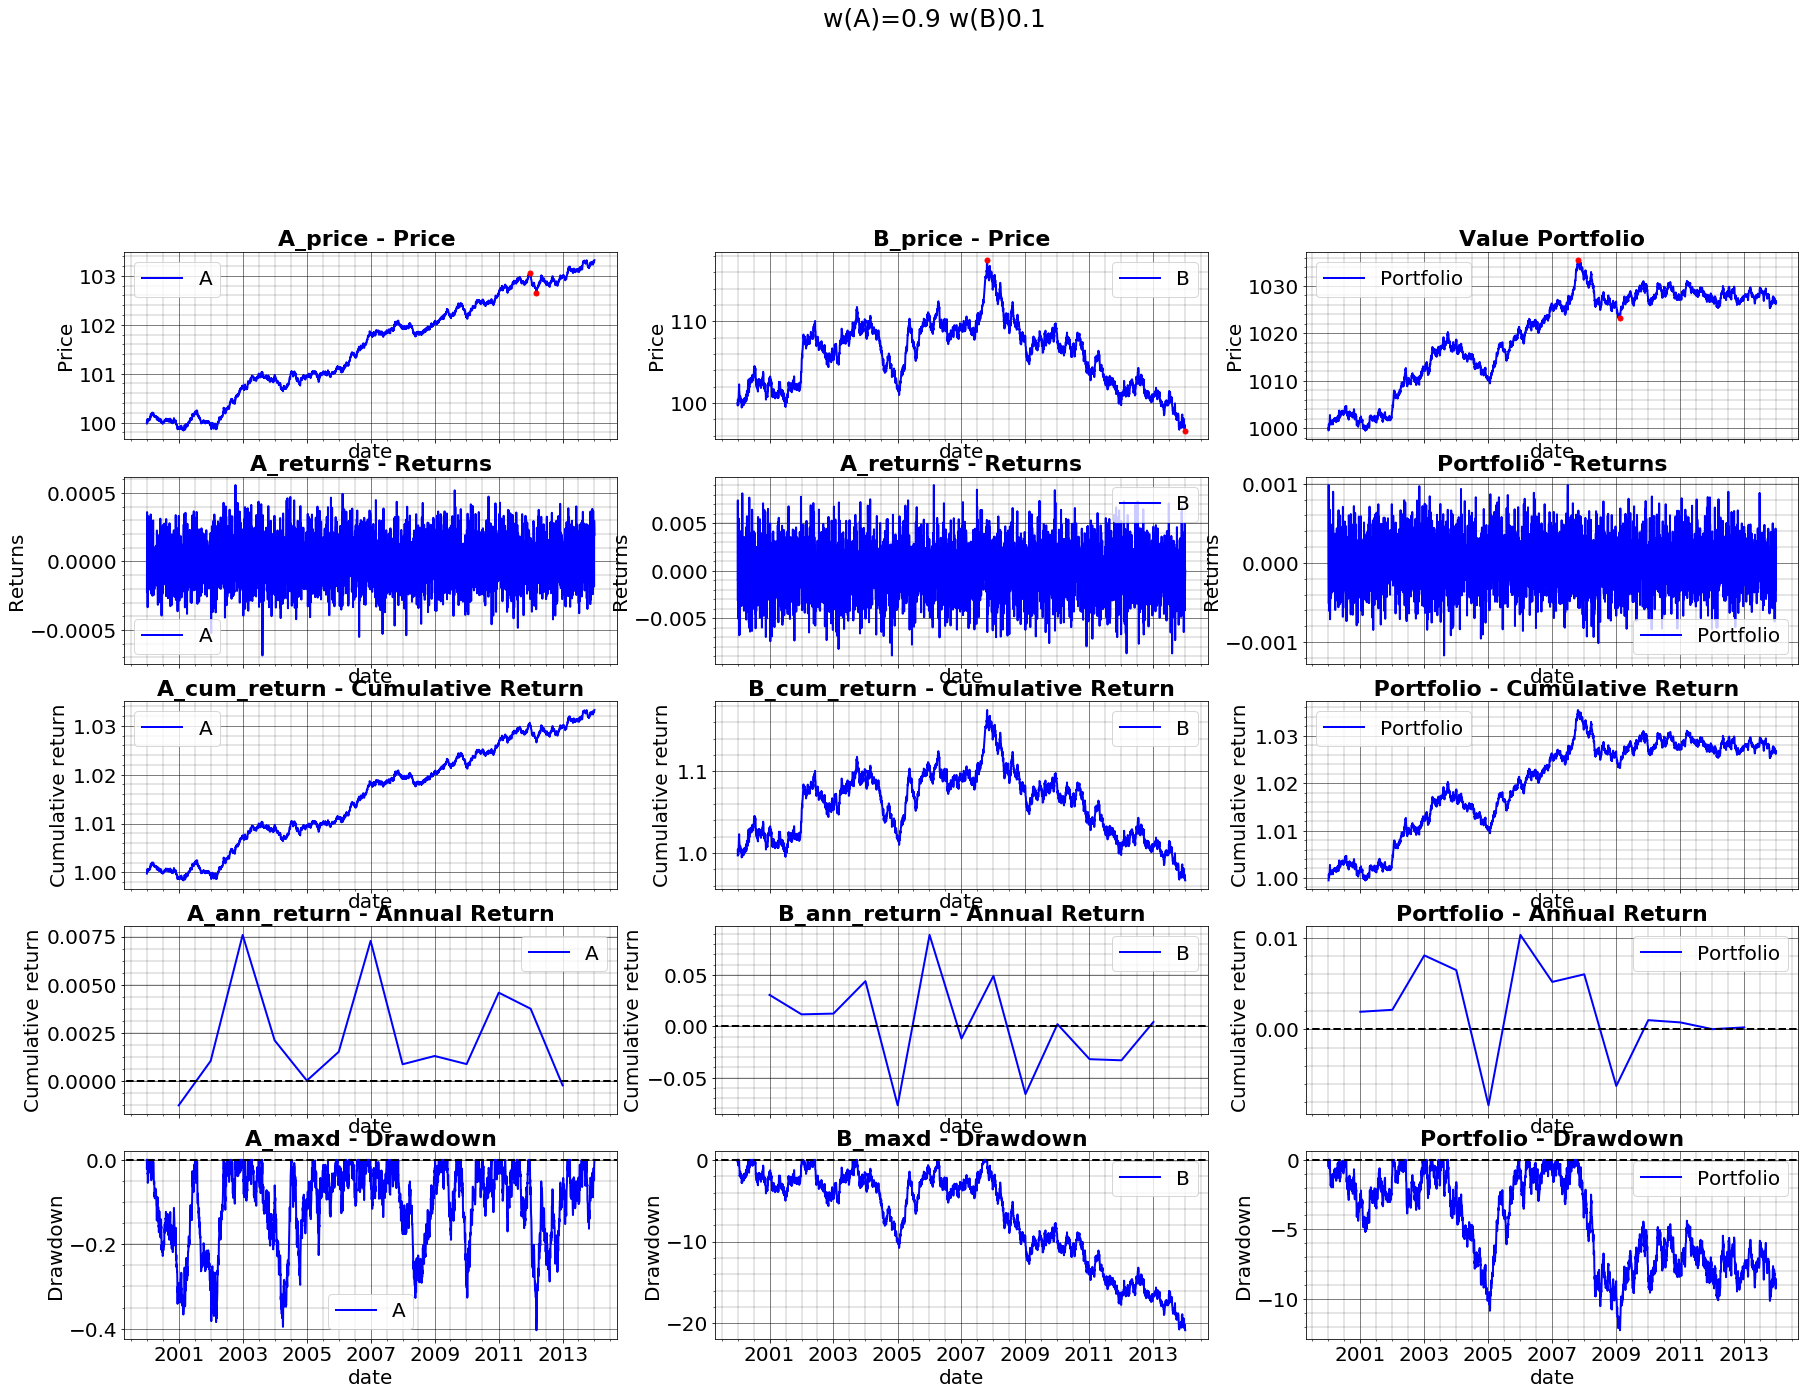

In [412]:
import matplotlib.pyplot as plt

pctP,i,j=max_drawdown(prices["Portfolio_evolution"].dropna())
print("Retorno de Portfolio: "+ str(round((prices["Port_cum_return"].tail(1)[0] -1 )*100,2)))
print("Drawdown Portfolio: "+ str(round(min(prices["Port_maxd"].dropna()),2)))
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5,3, sharex=True, figsize=(30,20))
f.suptitle("w(A)="+str(w_a)+" w(B)"+str(w_b),y=1.05, fontsize=25) #  "2018 - 07 - 11"

ax1[0].plot(prices["A_price"],color="b",label="A",lw=2)#import matplotlib as mpl
pctA,i,j=max_drawdown(prices["A_price"])
ax1[0].plot([i, j], [prices["A_price"].loc[i], prices["A_price"].loc[j]], 'o', color='Red', markersize=5)
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[0].set_xlabel('date' ,fontsize=20)
ax1[0].set_ylabel('Price' ,fontsize=20)
ax1[0].set_title( prices["A_price"].name+' - Price ',fontsize=22, fontweight='bold')
ax1[0].tick_params(labelsize = 20)
ax1[0].legend( fontsize=20,loc='best')#shadow=True,
ax1[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[0].minorticks_on()

ax1[1].plot(prices["B_price"],color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
pctB,i,j=max_drawdown(prices["B_price"])
ax1[1].plot([i, j], [prices["B_price"].loc[i], prices["B_price"].loc[j]], 'o', color='Red', markersize=5)
ax1[1].set_xlabel('date' ,fontsize=20)
ax1[1].set_ylabel('Price' ,fontsize=20)
ax1[1].set_title( prices["B_price"].name+' - Price',fontsize=22, fontweight='bold')
ax1[1].tick_params(labelsize = 20)
ax1[1].legend( fontsize=20,loc='best')#shadow=True,
ax1[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[1].minorticks_on()

ax1[2].plot(prices["Portfolio_evolution"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
pctP,i,j=max_drawdown(prices["Portfolio_evolution"].dropna())
ax1[2].plot([i, j], [prices["Portfolio_evolution"].loc[i], prices["Portfolio_evolution"].loc[j]], 'o', color='Red', markersize=5)
ax1[2].set_xlabel('date' ,fontsize=20)
ax1[2].set_ylabel('Price' ,fontsize=20)
ax1[2].set_title('Value Portfolio',fontsize=22, fontweight='bold')
ax1[2].tick_params(labelsize = 20)
ax1[2].legend( fontsize=20,loc='best')#shadow=True,
ax1[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[2].minorticks_on()

ax2[0].plot(prices["A_returns"],color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[0].set_xlabel('date' ,fontsize=20)
ax2[0].set_ylabel('Returns' ,fontsize=20)
ax2[0].set_title( prices["A_returns"].name+' - Returns',fontsize=22, fontweight='bold')
ax2[0].tick_params(labelsize = 20)
ax2[0].legend( fontsize=20,loc='best')#shadow=True,
ax2[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[0].minorticks_on()

ax2[1].plot(prices["B_returns"],color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[1].set_xlabel('date' ,fontsize=20)
ax2[1].set_ylabel('Returns' ,fontsize=20)
ax2[1].set_title( prices["A_returns"].name+' - Returns',fontsize=22, fontweight='bold')
ax2[1].tick_params(labelsize = 20)
ax2[1].legend( fontsize=20,loc='best')#shadow=True,
ax2[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[1].minorticks_on()

ax2[2].plot(prices["Port_returns"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[2].set_xlabel('date' ,fontsize=20)
ax2[2].set_ylabel('Returns' ,fontsize=20)
ax2[2].set_title( 'Portfolio - Returns',fontsize=22, fontweight='bold')
ax2[2].tick_params(labelsize = 20)
ax2[2].legend( fontsize=20,loc='best')#shadow=True,
ax2[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[2].minorticks_on()


ax3[0].plot(prices["A_cum_return"],color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[0].set_xlabel('date' ,fontsize=20)
ax3[0].set_ylabel('Cumulative return' ,fontsize=20)
ax3[0].set_title( prices["A_cum_return"].name+' - Cumulative Return',fontsize=22, fontweight='bold')
ax3[0].tick_params(labelsize = 20)
ax3[0].legend( fontsize=20,loc='best')#shadow=True,
ax3[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[0].minorticks_on()

ax3[1].plot(prices["B_cum_return"],color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[1].set_xlabel('date' ,fontsize=20)
ax3[1].set_ylabel('Cumulative return' ,fontsize=20)
ax3[1].set_title( prices["B_cum_return"].name+' - Cumulative Return',fontsize=22, fontweight='bold')
ax3[1].tick_params(labelsize = 20)
ax3[1].legend( fontsize=20,loc='best')#shadow=True,
ax3[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[1].minorticks_on()

ax3[2].plot(prices["Port_cum_return"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[2].set_xlabel('date' ,fontsize=20)
ax3[2].set_ylabel('Cumulative return' ,fontsize=20)
ax3[2].set_title( ' Portfolio - Cumulative Return',fontsize=22, fontweight='bold')
ax3[2].tick_params(labelsize = 20)
ax3[2].legend( fontsize=20,loc='best')#shadow=True,
ax3[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[2].minorticks_on()

ax4[0].plot(prices["A_ann_return"].drop_duplicates(),color="b",label="A",lw=2)#import matplotlib as mpl
ax4[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[0].set_xlabel('date' ,fontsize=20)
ax4[0].set_ylabel('Cumulative return' ,fontsize=20)
ax4[0].set_title( prices["A_ann_return"].name+' - Annual Return',fontsize=22, fontweight='bold')
ax4[0].tick_params(labelsize = 20)
ax4[0].legend( fontsize=20,loc='best')#shadow=True,
ax4[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[0].minorticks_on()

ax4[1].plot(prices["B_ann_return"].drop_duplicates(),color="b",label="B",lw=2)#import matplotlib as mpl
ax4[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[1].set_xlabel('date' ,fontsize=20)
ax4[1].set_ylabel('Cumulative return' ,fontsize=20)
ax4[1].set_title(prices["B_ann_return"].name+' - Annual Return',fontsize=22, fontweight='bold')
ax4[1].tick_params(labelsize = 20)
ax4[1].legend( fontsize=20,loc='best')#shadow=True,
ax4[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[1].minorticks_on()

ax4[2].plot(prices["Port_ann_return"].drop_duplicates(),color="b",label="Portfolio",lw=2)#import matplotlib as mpl
ax4[2].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[2].set_xlabel('date' ,fontsize=20)
ax4[2].set_ylabel('Cumulative return' ,fontsize=20)
ax4[2].set_title('Portfolio - Annual Return',fontsize=22, fontweight='bold')
ax4[2].tick_params(labelsize = 20)
ax4[2].legend( fontsize=20,loc='best')#shadow=True,
ax4[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[2].minorticks_on()


ax5[0].plot(prices["A_maxd"],color="b",label="A",lw=2)#import matplotlib as mpl
ax5[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[0].set_xlabel('date' ,fontsize=20)
ax5[0].set_ylabel('Drawdown' ,fontsize=20)
ax5[0].set_title( prices["A_maxd"].name+' - Drawdown',fontsize=22, fontweight='bold')
ax5[0].tick_params(labelsize = 20)
ax5[0].legend( fontsize=20,loc='best')#shadow=True,
ax5[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[0].minorticks_on()

ax5[1].plot(prices["B_maxd"],color="b",label="B",lw=2)#import matplotlib as mpl
ax5[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[1].set_xlabel('date' ,fontsize=20)
ax5[1].set_ylabel('Drawdown' ,fontsize=20)
ax5[1].set_title(prices["B_maxd"].name+' - Drawdown',fontsize=22, fontweight='bold')
ax5[1].tick_params(labelsize = 20)
ax5[1].legend( fontsize=20,loc='best')#shadow=True,
ax5[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[1].minorticks_on()

ax5[2].plot(prices["Port_maxd"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
ax5[2].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[2].set_xlabel('date' ,fontsize=20)
ax5[2].set_ylabel('Drawdown' ,fontsize=20)
ax5[2].set_title('Portfolio - Drawdown',fontsize=22, fontweight='bold')
ax5[2].tick_params(labelsize = 20)
ax5[2].legend( fontsize=20,loc='best')#shadow=True,
ax5[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[2].minorticks_on()

In [416]:
def plot_price(prices):
    pctP,i,j=max_drawdown(prices["Portfolio_evolution"].dropna())
    print("Retorno de Portfolio: "+ str(round((prices["Port_cum_return"].tail(1)[0] -1 )*100,2)))
    print("Drawdown Portfolio: "+ str(round(min(prices["Port_maxd"].dropna()),2)))
    print("# años con retornos anuales positivos : "+str(sum(prices["Port_ann_return"].drop_duplicates()>0))+"/"+str(prices["Port_ann_return"].drop_duplicates().shape[0]))
    f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5,3, sharex=True, figsize=(30,20))
    f.suptitle("w(A)="+str(w_a)+" w(B)"+str(w_b),y=1.05, fontsize=25) #  "2018 - 07 - 11"

    ax1[0].plot(prices["A_price"],color="b",label="A",lw=2)#import matplotlib as mpl
    pctA,i,j=max_drawdown(prices["A_price"])
    ax1[0].plot([i, j], [prices["A_price"].loc[i], prices["A_price"].loc[j]], 'o', color='Red', markersize=5)
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax1[0].set_xlabel('date' ,fontsize=20)
    ax1[0].set_ylabel('Price' ,fontsize=20)
    ax1[0].set_title( prices["A_price"].name+' - Price ',fontsize=22, fontweight='bold')
    ax1[0].tick_params(labelsize = 20)
    ax1[0].legend( fontsize=20,loc='best')#shadow=True,
    ax1[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax1[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax1[0].minorticks_on()

    ax1[1].plot(prices["B_price"],color="b",label="B",lw=2)#import matplotlib as mpl
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    pctB,i,j=max_drawdown(prices["B_price"])
    ax1[1].plot([i, j], [prices["B_price"].loc[i], prices["B_price"].loc[j]], 'o', color='Red', markersize=5)
    ax1[1].set_xlabel('date' ,fontsize=20)
    ax1[1].set_ylabel('Price' ,fontsize=20)
    ax1[1].set_title( prices["B_price"].name+' - Price',fontsize=22, fontweight='bold')
    ax1[1].tick_params(labelsize = 20)
    ax1[1].legend( fontsize=20,loc='best')#shadow=True,
    ax1[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax1[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax1[1].minorticks_on()

    ax1[2].plot(prices["Portfolio_evolution"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    pctP,i,j=max_drawdown(prices["Portfolio_evolution"].dropna())
    ax1[2].plot([i, j], [prices["Portfolio_evolution"].loc[i], prices["Portfolio_evolution"].loc[j]], 'o', color='Red', markersize=5)
    ax1[2].set_xlabel('date' ,fontsize=20)
    ax1[2].set_ylabel('Price' ,fontsize=20)
    ax1[2].set_title('Value Portfolio',fontsize=22, fontweight='bold')
    ax1[2].tick_params(labelsize = 20)
    ax1[2].legend( fontsize=20,loc='best')#shadow=True,
    ax1[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax1[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax1[2].minorticks_on()

    ax2[0].plot(prices["A_returns"],color="b",label="A",lw=2)#import matplotlib as mpl
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax2[0].set_xlabel('date' ,fontsize=20)
    ax2[0].set_ylabel('Returns' ,fontsize=20)
    ax2[0].set_title( prices["A_returns"].name+' - Returns',fontsize=22, fontweight='bold')
    ax2[0].tick_params(labelsize = 20)
    ax2[0].legend( fontsize=20,loc='best')#shadow=True,
    ax2[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax2[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax2[0].minorticks_on()

    ax2[1].plot(prices["B_returns"],color="b",label="B",lw=2)#import matplotlib as mpl
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax2[1].set_xlabel('date' ,fontsize=20)
    ax2[1].set_ylabel('Returns' ,fontsize=20)
    ax2[1].set_title( prices["A_returns"].name+' - Returns',fontsize=22, fontweight='bold')
    ax2[1].tick_params(labelsize = 20)
    ax2[1].legend( fontsize=20,loc='best')#shadow=True,
    ax2[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax2[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax2[1].minorticks_on()

    ax2[2].plot(prices["Port_returns"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax2[2].set_xlabel('date' ,fontsize=20)
    ax2[2].set_ylabel('Returns' ,fontsize=20)
    ax2[2].set_title( 'Portfolio - Returns',fontsize=22, fontweight='bold')
    ax2[2].tick_params(labelsize = 20)
    ax2[2].legend( fontsize=20,loc='best')#shadow=True,
    ax2[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax2[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax2[2].minorticks_on()


    ax3[0].plot(prices["A_cum_return"],color="b",label="A",lw=2)#import matplotlib as mpl
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax3[0].set_xlabel('date' ,fontsize=20)
    ax3[0].set_ylabel('Cumulative return' ,fontsize=20)
    ax3[0].set_title( prices["A_cum_return"].name+' - Cumulative Return',fontsize=22, fontweight='bold')
    ax3[0].tick_params(labelsize = 20)
    ax3[0].legend( fontsize=20,loc='best')#shadow=True,
    ax3[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax3[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax3[0].minorticks_on()

    ax3[1].plot(prices["B_cum_return"],color="b",label="B",lw=2)#import matplotlib as mpl
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax3[1].set_xlabel('date' ,fontsize=20)
    ax3[1].set_ylabel('Cumulative return' ,fontsize=20)
    ax3[1].set_title( prices["B_cum_return"].name+' - Cumulative Return',fontsize=22, fontweight='bold')
    ax3[1].tick_params(labelsize = 20)
    ax3[1].legend( fontsize=20,loc='best')#shadow=True,
    ax3[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax3[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax3[1].minorticks_on()

    ax3[2].plot(prices["Port_cum_return"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
    #ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax3[2].set_xlabel('date' ,fontsize=20)
    ax3[2].set_ylabel('Cumulative return' ,fontsize=20)
    ax3[2].set_title( ' Portfolio - Cumulative Return',fontsize=22, fontweight='bold')
    ax3[2].tick_params(labelsize = 20)
    ax3[2].legend( fontsize=20,loc='best')#shadow=True,
    ax3[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax3[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax3[2].minorticks_on()

    ax4[0].plot(prices["A_ann_return"].drop_duplicates(),color="b",label="A",lw=2)#import matplotlib as mpl
    ax4[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax4[0].set_xlabel('date' ,fontsize=20)
    ax4[0].set_ylabel('Cumulative return' ,fontsize=20)
    ax4[0].set_title( prices["A_ann_return"].name+' - Annual Return',fontsize=22, fontweight='bold')
    ax4[0].tick_params(labelsize = 20)
    ax4[0].legend( fontsize=20,loc='best')#shadow=True,
    ax4[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax4[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax4[0].minorticks_on()

    ax4[1].plot(prices["B_ann_return"].drop_duplicates(),color="b",label="B",lw=2)#import matplotlib as mpl
    ax4[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax4[1].set_xlabel('date' ,fontsize=20)
    ax4[1].set_ylabel('Cumulative return' ,fontsize=20)
    ax4[1].set_title(prices["B_ann_return"].name+' - Annual Return',fontsize=22, fontweight='bold')
    ax4[1].tick_params(labelsize = 20)
    ax4[1].legend( fontsize=20,loc='best')#shadow=True,
    ax4[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax4[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax4[1].minorticks_on()

    ax4[2].plot(prices["Port_ann_return"].drop_duplicates(),color="b",label="Portfolio",lw=2)#import matplotlib as mpl
    ax4[2].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax4[2].set_xlabel('date' ,fontsize=20)
    ax4[2].set_ylabel('Cumulative return' ,fontsize=20)
    ax4[2].set_title('Portfolio - Annual Return',fontsize=22, fontweight='bold')
    ax4[2].tick_params(labelsize = 20)
    ax4[2].legend( fontsize=20,loc='best')#shadow=True,
    ax4[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax4[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax4[2].minorticks_on()


    ax5[0].plot(prices["A_maxd"],color="b",label="A",lw=2)#import matplotlib as mpl
    ax5[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax5[0].set_xlabel('date' ,fontsize=20)
    ax5[0].set_ylabel('Drawdown' ,fontsize=20)
    ax5[0].set_title( prices["A_maxd"].name+' - Drawdown',fontsize=22, fontweight='bold')
    ax5[0].tick_params(labelsize = 20)
    ax5[0].legend( fontsize=20,loc='best')#shadow=True,
    ax5[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax5[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax5[0].minorticks_on()

    ax5[1].plot(prices["B_maxd"],color="b",label="B",lw=2)#import matplotlib as mpl
    ax5[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax5[1].set_xlabel('date' ,fontsize=20)
    ax5[1].set_ylabel('Drawdown' ,fontsize=20)
    ax5[1].set_title(prices["B_maxd"].name+' - Drawdown',fontsize=22, fontweight='bold')
    ax5[1].tick_params(labelsize = 20)
    ax5[1].legend( fontsize=20,loc='best')#shadow=True,
    ax5[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax5[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax5[1].minorticks_on()

    ax5[2].plot(prices["Port_maxd"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
    ax5[2].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
    ax5[2].set_xlabel('date' ,fontsize=20)
    ax5[2].set_ylabel('Drawdown' ,fontsize=20)
    ax5[2].set_title('Portfolio - Drawdown',fontsize=22, fontweight='bold')
    ax5[2].tick_params(labelsize = 20)
    ax5[2].legend( fontsize=20,loc='best')#shadow=True,
    ax5[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
    ax5[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
    ax5[2].minorticks_on()

/home/ubuntu/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Retorno de Portfolio: 2.65
Drawdown Portfolio: -12.27
# años con retornos anuales positivos : 11/14


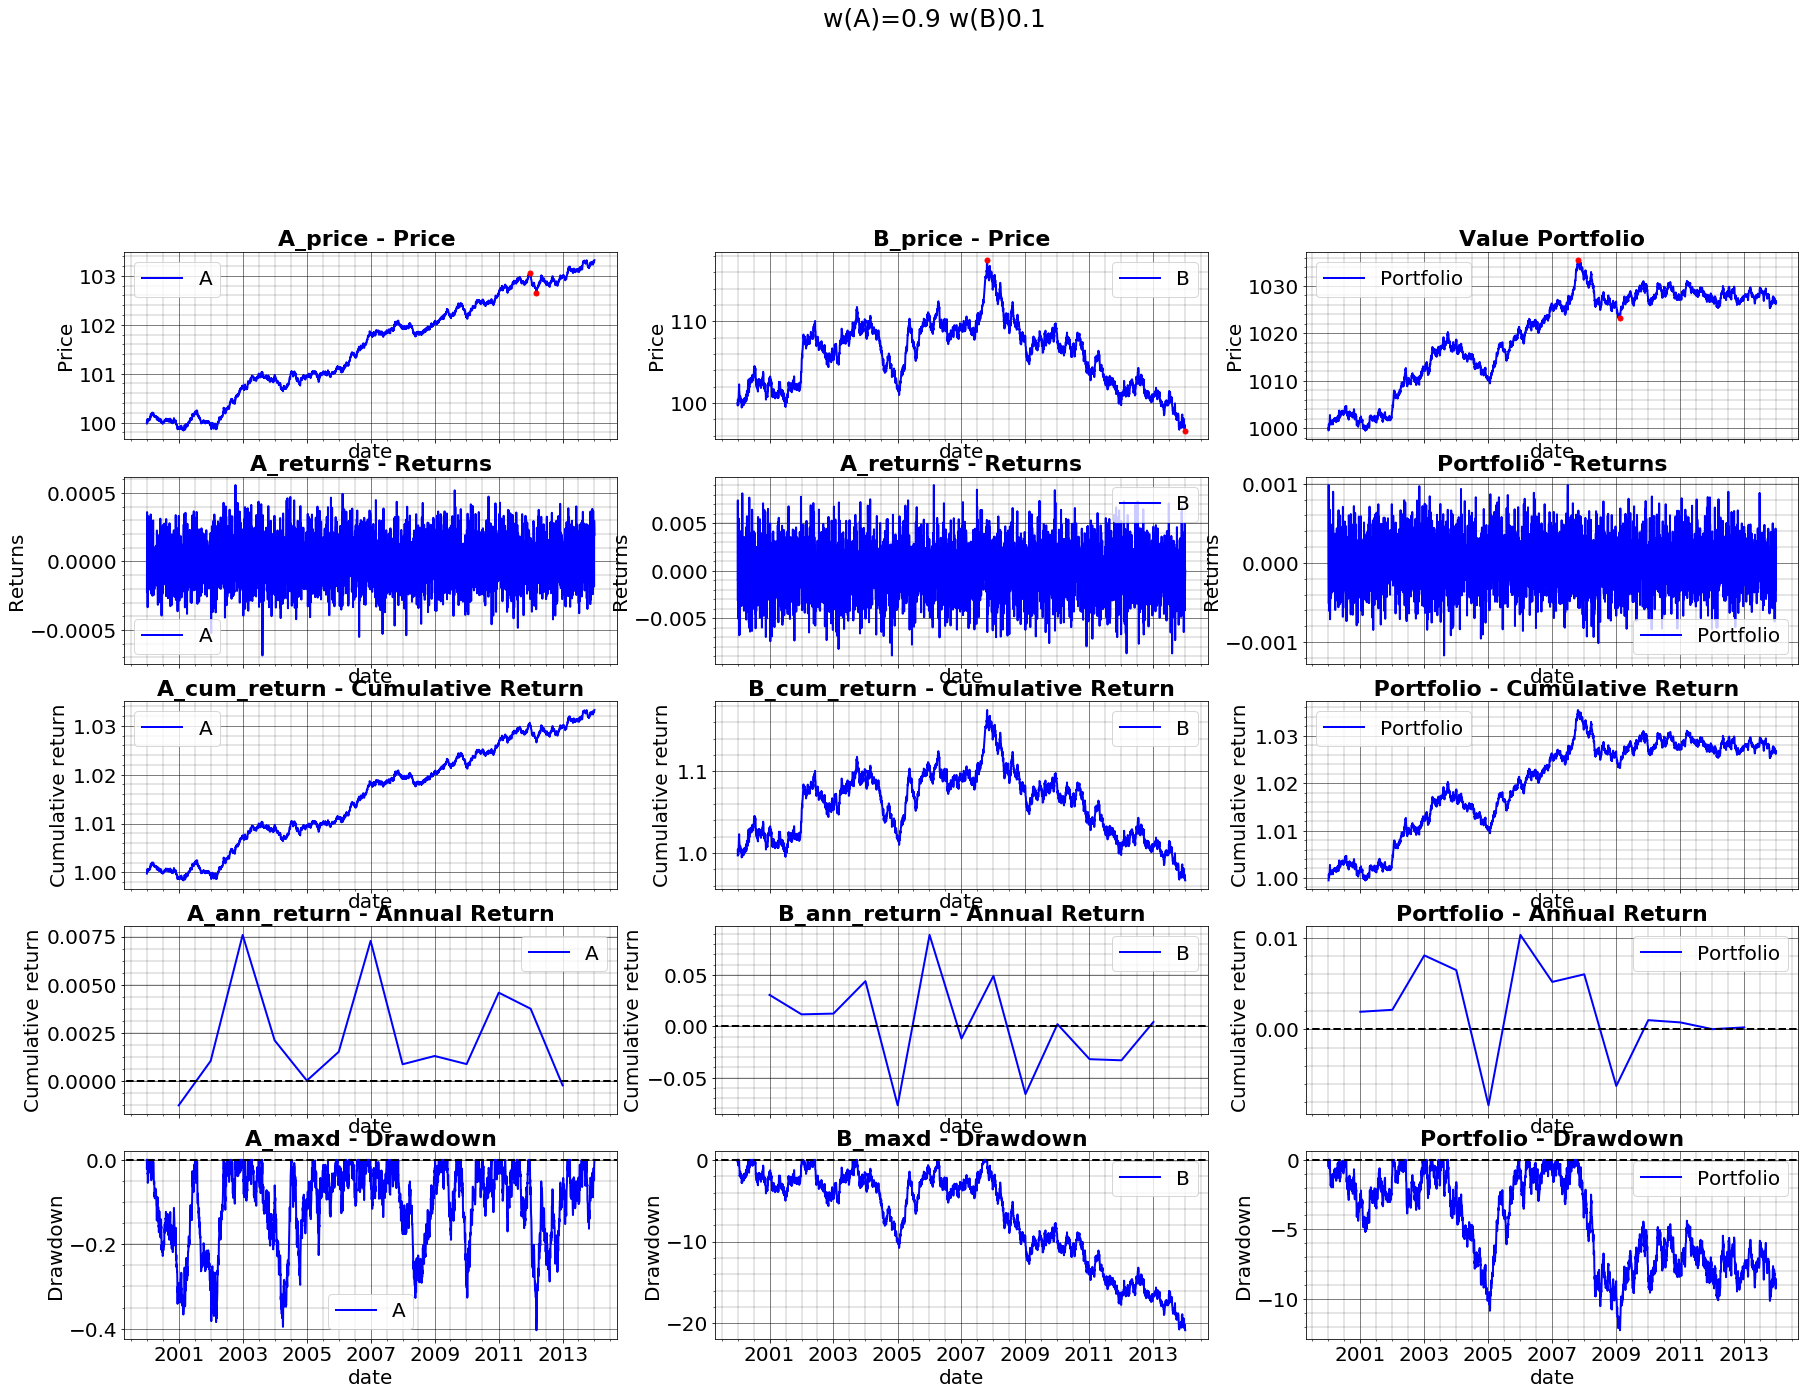

In [417]:
plot_price(prices)

In [149]:
#prices["A_returns"][0:i]>0

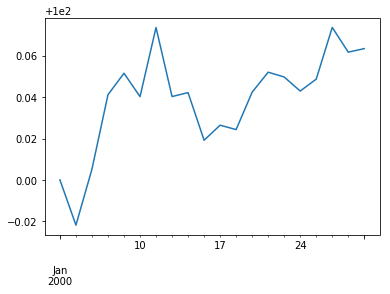

mean:3.3419074228181523e-05 sd: 3.683108597658571e-08
retornos positivos:0.55


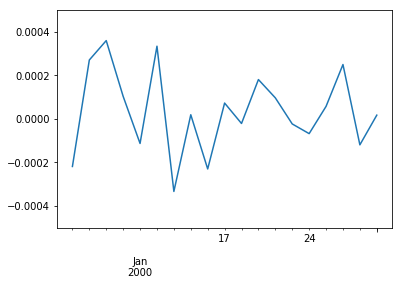

In [150]:
i=20
prices["A_price"][0:i].plot()
plt.show()
ax3 = prices["A_returns"][0:i].plot()#.hist(bins=10,range=(-.0006,.0006))
ax3.set_ylim(-.0005,.0005)
print("mean:"+str(prices["A_returns"][0:i].mean())+" sd: "+str(prices["A_returns"][0:i].var()))
print("retornos positivos:"+str(sum(prices["A_returns"][0:i]>0)/len(prices["A_returns"][0:i])))

# 2. Rebalanceos diarios

In [418]:
### rebalanceos diarios con mismos pesos durante el periodo
df1=prices[["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return","A_maxd","B_maxd","A_ann_return","B_ann_return"]]
df1["A_returns_1"]=df1["A_returns"]+1
df1["B_returns_1"]=df1["B_returns"]+1
#df1["Port"]=df1["A_returns_p"]+df1["B_returns_p"]
df1['Portfolio_evolution'] = np.nan
df1['A_returns_p'] = np.nan
df1['B_returns_p'] = np.nan
df1['Port'] = np.nan


dates_=list(df1.index)
for i in range(len(dates_)):
    if i>0:
        
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*.9
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*.1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        
        aux=df1.loc[dates_[i]]
        df1.loc[dates_[i]]['Portfolio_evolution']=df1.loc[dates_[i-1]]['Portfolio_evolution']*df1.loc[dates_[i]]["Port"]
    else:
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*.9
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*.1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        df1.loc[dates_[i]]['Portfolio_evolution']=1000

portfolio=pd.DataFrame(df1['Portfolio_evolution'])
portfolio.columns=["Portfolio"]

df1["Port_returns"]=get_return(portfolio)
df1["Port_cum_return"]= get_return_cum(portfolio)
df1["Port_ann_return"]=get_return_annual(portfolio)
df1["Port_maxd"]=get_roll_drawdown(portfolio.dropna())
df1.head()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

A_price     B_price  A_returns  B_returns  A_cum_return  \
2000-01-03  100.000000  100.000000        NaN        NaN           NaN   
2000-01-04   99.978111   99.692963  -0.000219  -0.003070      0.999781   
2000-01-05  100.005187  100.433251   0.000271   0.007426      1.000052   
2000-01-06  100.041193  100.328317   0.000360  -0.001045      1.000412   
2000-01-07  100.051568  100.267796   0.000104  -0.000603      1.000516   

            B_cum_return    A_maxd    B_maxd  A_ann_return  B_ann_return  \
2000-01-03           NaN  0.000000  0.000000           NaN           NaN   
2000-01-04      0.996930 -0.021889 -0.307037           NaN           NaN   
2000-01-05      1.004333  0.000000  0.000000           NaN           NaN   
2000-01-06      1.003283  0.000000 -0.104934           NaN           NaN   
2000-01-07      1.002678  0.000000 -0.165454           NaN           NaN   

            A_returns_1  B_returns_1  Portfolio_evolution  A_returns_p  \
2000-01-03          NaN          NaN          1000.000000          NaN   
2000-01-04     0.999781     0.996930           999.495966     0.899803   
2000-01-05     1.000271     1.007426          1000.481774     0.900244   
2000-01-06     1.000360     0.998955          1000.701435     0.900324   
2000-01-07     1.000104     0.999397          1000.734470     0.900093   

            B_returns_p      Port  Port_returns  Port_cum_return  \
2000-01-03          NaN       NaN           NaN              NaN   
2000-01-04     0.099693  0.999496     -0.000504         0.999496   
2000-01-05     0.100743  1.000986      0.000986         1.000482   
2000-01-06     0.099896  1.000220      0.000220         1.000701   
2000-01-07     0.099940  1.000033      0.000033         1.000734   

            Port_ann_return  Port_maxd  
2000-01-03              NaN   0.000000  
2000-01-04              NaN  -0.504034  
2000-01-05              NaN   0.000000  
2000-01-06              NaN   0.000000  
2000-01-07              NaN   0.000000

/home/ubuntu/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Retorno de Portfolio: 2.76
Drawdown Portfolio: -11.22
# años con retornos anuales positivos : 11/14


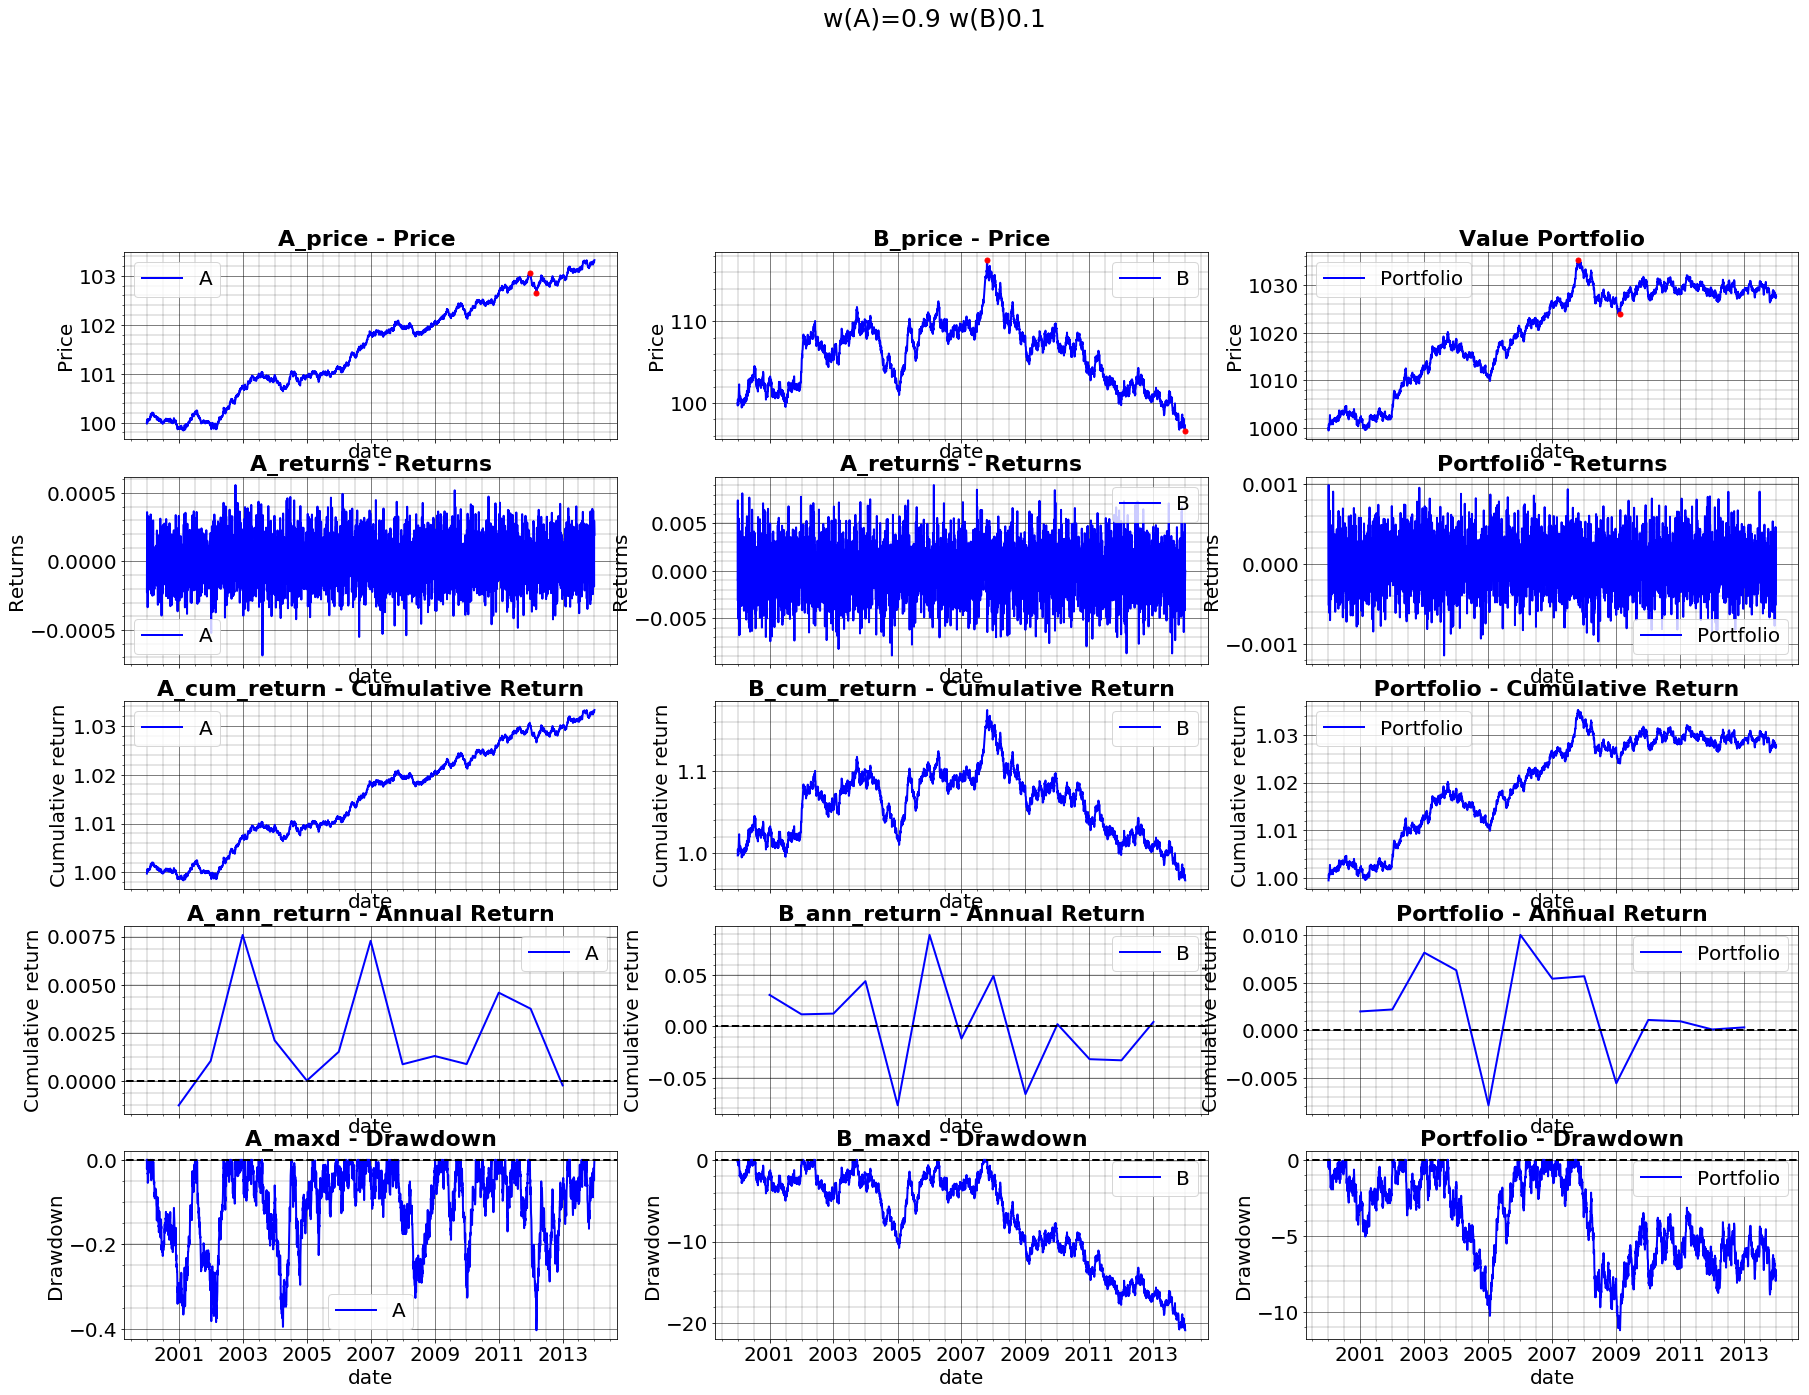

In [419]:
plot_price(df1)

# 2. Rebalanceos semanales

In [420]:
df_price=pd.concat([instrument_A,instrument_B],axis=1)
df_price.columns=["A_price","B_price"]
#df_price['day_of_week'] = df_price.index.weekday_name
#df_price=df_price[df_price.day_of_week=="Monday"]
df_price=df_price.asfreq('W-MON')
#df_price=df_price[["A_price","B_price"]]
aux=get_return(df_price)#pd.DataFrame(prices.pct_change())#()
#aux.colums=["A_returns","B_returns"]
aux1=get_return_cum(df_price)#pd.DataFrame((prices.pct_change()+1).cumprod())#(prices.pct_change()+1).cumprod())
aux2=get_return_annual(df_price)
aux2=aux2.asfreq("D").ffill().asfreq("W-MON")
aux3=get_roll_drawdown(df_price)
df_price=pd.concat([df_price,aux,aux1,aux3,aux2],axis=1)
#df_price=pd.merge(df_price,aux2,left_index=True,right_index=True,how="left")
df_price.columns=["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return",
               "A_maxd","B_maxd","A_ann_return","B_ann_return"]
df_price["A_returns_1"]=df_price["A_returns"]+1
df_price["B_returns_1"]=df_price["B_returns"]+1
#df_price.head()




### rebalanceos diarios con mismos pesos durante el periodo
df1=df_price[["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return","A_maxd","B_maxd","A_ann_return","B_ann_return"]]
df1["A_returns_1"]=df1["A_returns"]+1
df1["B_returns_1"]=df1["B_returns"]+1
#df1["Port"]=df1["A_returns_p"]+df1["B_returns_p"]
df1['Portfolio_evolution'] = np.nan
df1['A_returns_p'] = np.nan
df1['B_returns_p'] = np.nan
df1['Port'] = np.nan


dates_=list(df1.index)
for i in range(len(dates_)):
    if i>0:
        
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*.9
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*.1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        
        aux=df1.loc[dates_[i]]
        df1.loc[dates_[i]]['Portfolio_evolution']=df1.loc[dates_[i-1]]['Portfolio_evolution']*df1.loc[dates_[i]]["Port"]
    else:
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*.9
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*.1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        df1.loc[dates_[i]]['Portfolio_evolution']=1000

portfolio=pd.DataFrame(df1['Portfolio_evolution'])
portfolio.columns=["Portfolio"]

df1["Port_returns"]=get_return(portfolio)
df1["Port_cum_return"]= get_return_cum(portfolio)
df1["Port_ann_return"]=get_return_annual(portfolio).asfreq("D").ffill().asfreq("W-MON")
df1["Port_maxd"]=get_roll_drawdown(portfolio.dropna())
df1.head()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


A_price     B_price  A_returns  B_returns  A_cum_return  \
2000-01-03  100.000000  100.000000        NaN        NaN           NaN   
2000-01-10  100.040259   99.761504   0.000403  -0.002385      1.000403   
2000-01-17  100.026440  101.163946  -0.000138   0.014058      1.000264   
2000-01-24  100.042964  101.246729   0.000165   0.000818      1.000430   
2000-01-31  100.062105  100.528029   0.000191  -0.007098      1.000621   

            B_cum_return    A_maxd    B_maxd  A_ann_return  B_ann_return  \
2000-01-03           NaN  0.000000  0.000000           NaN           NaN   
2000-01-10      0.997615  0.000000 -0.238496           NaN           NaN   
2000-01-17      1.011639 -0.013819  0.000000           NaN           NaN   
2000-01-24      1.012467  0.000000  0.000000           NaN           NaN   
2000-01-31      1.005280  0.000000 -0.718700           NaN           NaN   

            A_returns_1  B_returns_1  Portfolio_evolution  A_returns_p  \
2000-01-03          NaN          NaN          1000.000000          NaN   
2000-01-10     1.000403     0.997615          1000.123831     0.900362   
2000-01-17     0.999862     1.014058          1001.405467     0.899876   
2000-01-24     1.000165     1.000818          1001.636295     0.900149   
2000-01-31     1.000191     0.992902          1001.097761     0.900172   

            B_returns_p      Port  Port_returns  Port_cum_return  \
2000-01-03          NaN       NaN           NaN              NaN   
2000-01-10     0.099762  1.000124      0.000124         1.000124   
2000-01-17     0.101406  1.001281      0.001281         1.001405   
2000-01-24     0.100082  1.000231      0.000231         1.001636   
2000-01-31     0.099290  0.999462     -0.000538         1.001098   

            Port_ann_return  Port_maxd  
2000-01-03              NaN   0.000000  
2000-01-10              NaN   0.000000  
2000-01-17              NaN   0.000000  
2000-01-24              NaN   0.000000  
2000-01-31              NaN  -0.538534

/home/ubuntu/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Retorno de Portfolio: 2.75
Drawdown Portfolio: -10.94
# años con retornos anuales positivos : 9/13


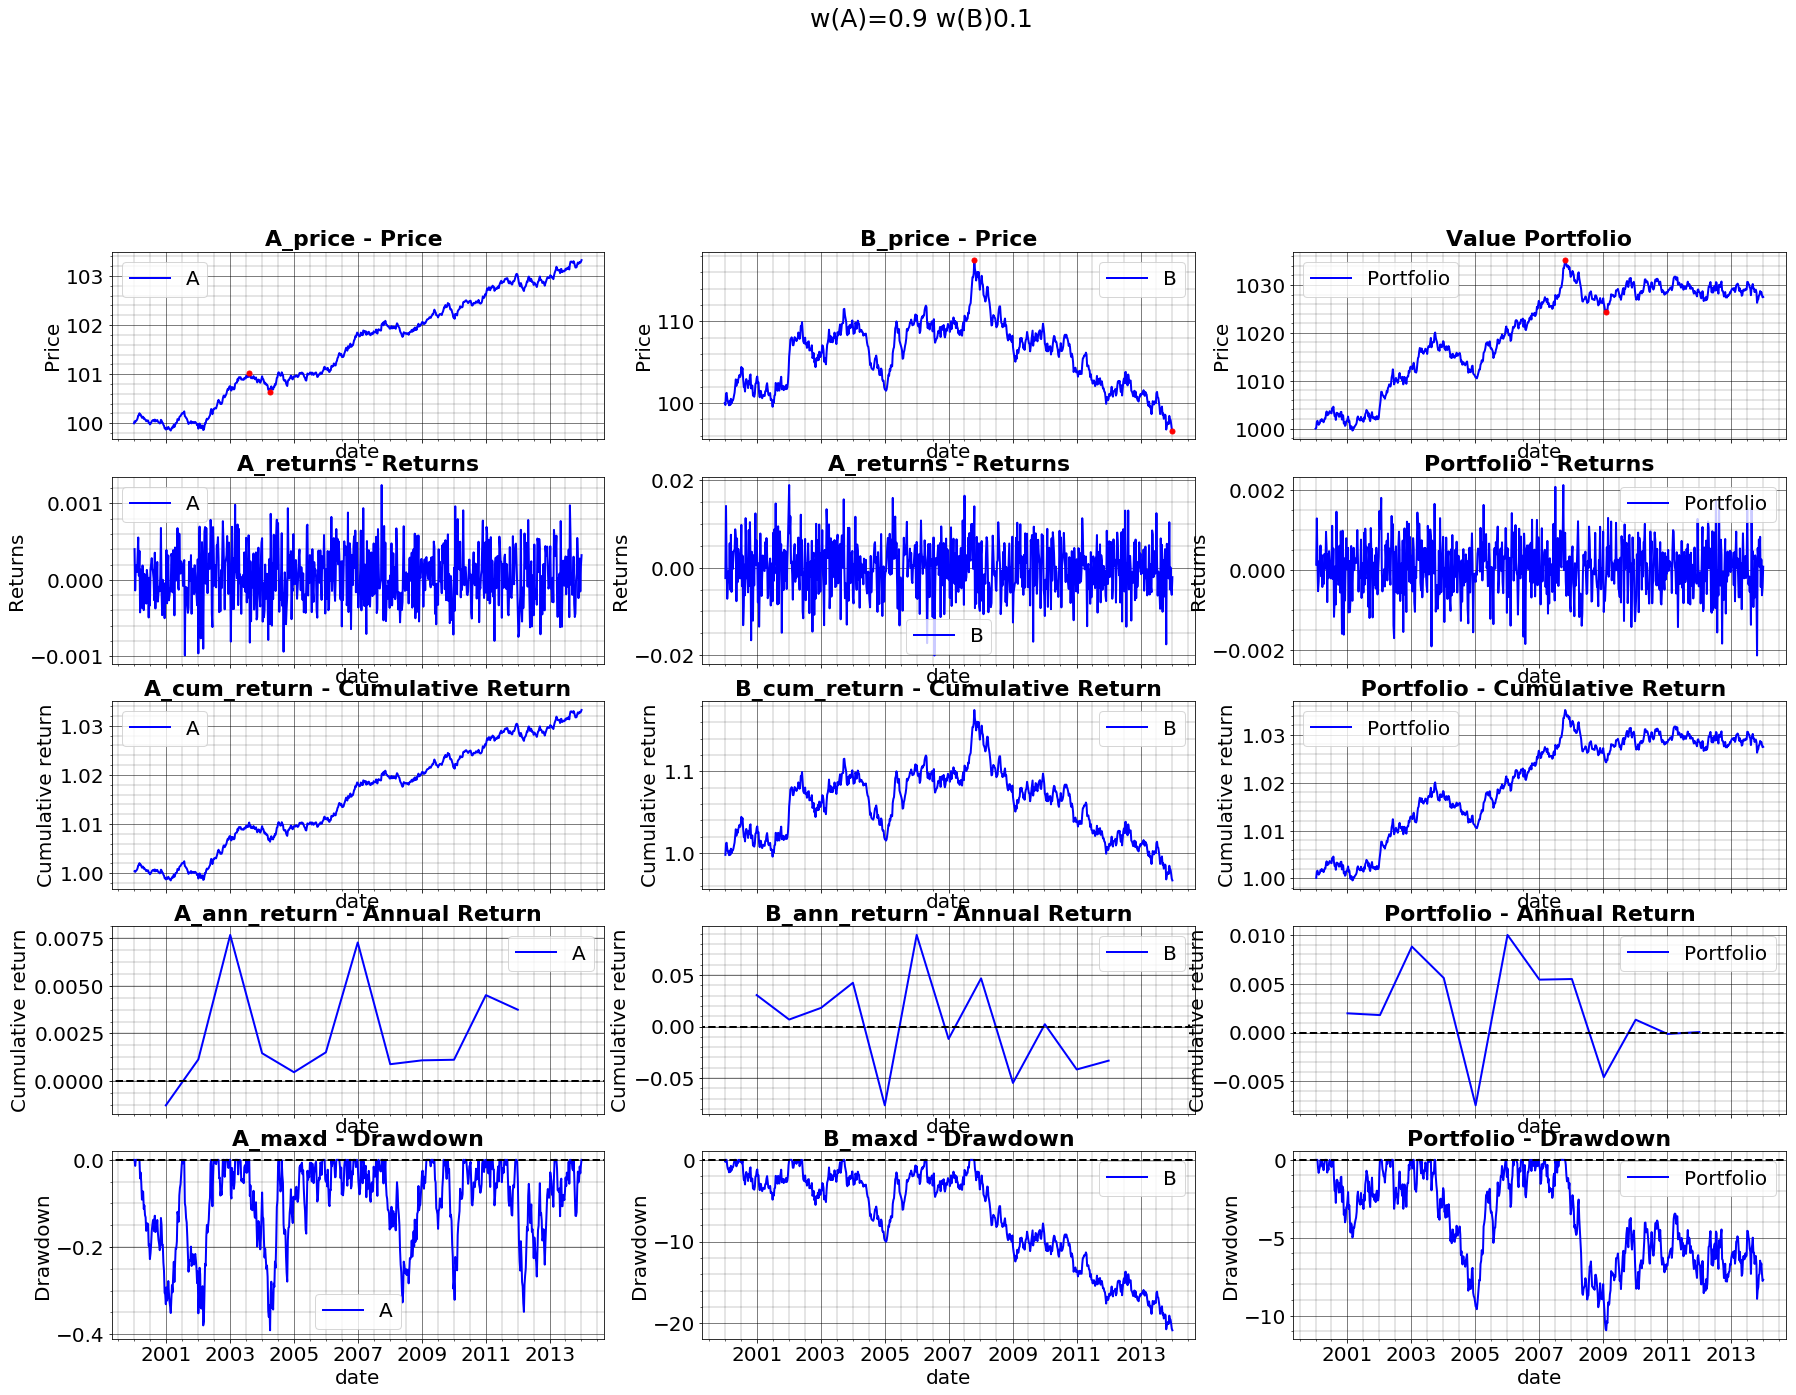

In [421]:
plot_price(df1)

# Rebalanceo Monthly

In [429]:
df_price=pd.concat([instrument_A,instrument_B],axis=1)
df_price.columns=["A_price","B_price"]
#df_price['day_of_week'] = df_price.index.weekday_name
#df_price=df_price[df_price.day_of_week=="Monday"]
df_price=df_price.asfreq('BMS')
#df_price=df_price[["A_price","B_price"]]
aux=get_return(df_price)#pd.DataFrame(prices.pct_change())#()
#aux.colums=["A_returns","B_returns"]
aux1=get_return_cum(df_price)#pd.DataFrame((prices.pct_change()+1).cumprod())#(prices.pct_change()+1).cumprod())
aux2=get_return_annual(df_price)
aux2=aux2.asfreq("D").ffill().asfreq("BMS")
aux3=get_roll_drawdown(df_price)
df_price=pd.concat([df_price,aux,aux1,aux3,aux2],axis=1)
#df_price=pd.merge(df_price,aux2,left_index=True,right_index=True,how="left")
df_price.columns=["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return",
               "A_maxd","B_maxd","A_ann_return","B_ann_return"]
df_price["A_returns_1"]=df_price["A_returns"]+1
df_price["B_returns_1"]=df_price["B_returns"]+1
#df_price.head()




### rebalanceos diarios con mismos pesos durante el periodo
df1=df_price[["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return","A_maxd","B_maxd","A_ann_return","B_ann_return"]]
df1["A_returns_1"]=df1["A_returns"]+1
df1["B_returns_1"]=df1["B_returns"]+1
#df1["Port"]=df1["A_returns_p"]+df1["B_returns_p"]
df1['Portfolio_evolution'] = np.nan
df1['A_returns_p'] = np.nan
df1['B_returns_p'] = np.nan
df1['Port'] = np.nan


dates_=list(df1.index)
for i in range(len(dates_)):
    if i>0:
        
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*.9
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*.1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        
        aux=df1.loc[dates_[i]]
        df1.loc[dates_[i]]['Portfolio_evolution']=df1.loc[dates_[i-1]]['Portfolio_evolution']*df1.loc[dates_[i]]["Port"]
    else:
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*.9
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*.1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        df1.loc[dates_[i]]['Portfolio_evolution']=1000

portfolio=pd.DataFrame(df1['Portfolio_evolution'])
portfolio.columns=["Portfolio"]

df1["Port_returns"]=get_return(portfolio)
df1["Port_cum_return"]= get_return_cum(portfolio)
df1["Port_ann_return"]=get_return_annual(portfolio).asfreq("D").ffill().asfreq("BMS")
df1["Port_maxd"]=get_roll_drawdown(portfolio.dropna())
df1.head()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


A_price     B_price  A_returns  B_returns  A_cum_return  \
2000-01-03  100.000000  100.000000        NaN        NaN           NaN   
2000-02-01  100.053820  100.851678   0.000538   0.008517      1.000538   
2000-03-01  100.187893   99.931489   0.001340  -0.009124      1.001879   
2000-04-03  100.113276  100.286968  -0.000745   0.003557      1.001133   
2000-05-01  100.100026  102.162656  -0.000132   0.018703      1.001000   

            B_cum_return    A_maxd    B_maxd  A_ann_return  B_ann_return  \
2000-01-03           NaN  0.000000  0.000000           NaN           NaN   
2000-02-01      1.008517  0.000000  0.000000           NaN           NaN   
2000-03-01      0.999315  0.000000 -0.920189           NaN           NaN   
2000-04-03      1.002870 -0.074617 -0.564710           NaN           NaN   
2000-05-01      1.021627 -0.087867  0.000000           NaN           NaN   

            A_returns_1  B_returns_1  Portfolio_evolution  A_returns_p  \
2000-01-03          NaN          NaN          1000.000000          NaN   
2000-02-01     1.000538     1.008517          1001.336055     0.900484   
2000-03-01     1.001340     0.990876          1001.630040     0.901206   
2000-04-03     0.999255     1.003557          1001.314960     0.899330   
2000-05-01     0.999868     1.018703          1003.068462     0.899881   

            B_returns_p      Port  Port_returns  Port_cum_return  \
2000-01-03          NaN       NaN           NaN              NaN   
2000-02-01     0.100852  1.001336      0.001336         1.001336   
2000-03-01     0.099088  1.000294      0.000294         1.001630   
2000-04-03     0.100356  0.999685     -0.000315         1.001315   
2000-05-01     0.101870  1.001751      0.001751         1.003068   

            Port_ann_return  Port_maxd  
2000-01-03              NaN    0.00000  
2000-02-01              NaN    0.00000  
2000-03-01              NaN    0.00000  
2000-04-03              NaN   -0.31508  
2000-05-01              NaN    0.00000

/home/ubuntu/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Retorno de Portfolio: 2.83
Drawdown Portfolio: -10.31
# años con retornos anuales positivos : 11/14


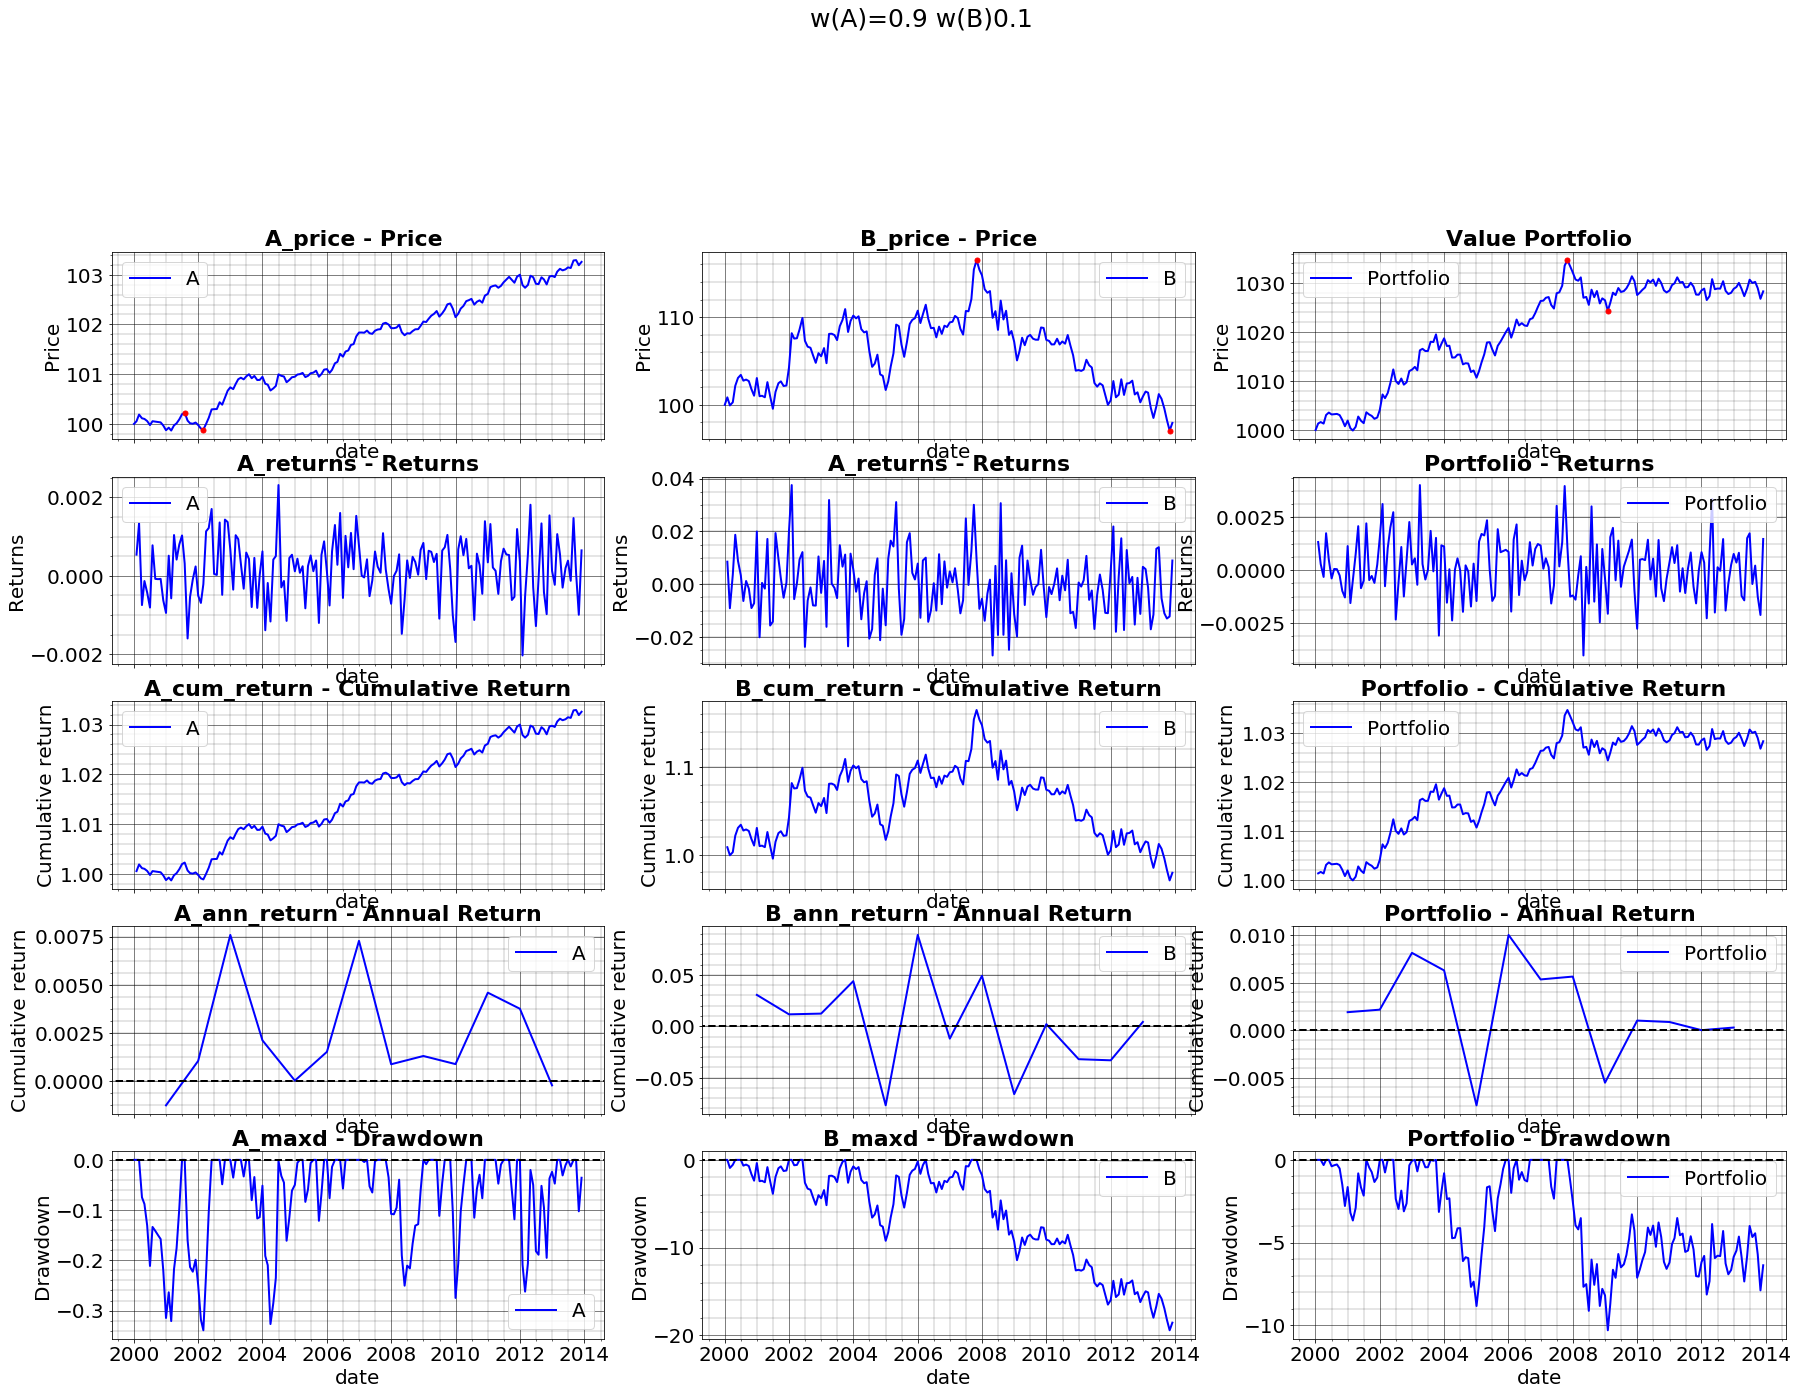

In [430]:
plot_price(df1)

# Rebalanceo Quarterly

In [433]:
df_price=pd.concat([instrument_A,instrument_B],axis=1)
df_price.columns=["A_price","B_price"]
#df_price['day_of_week'] = df_price.index.weekday_name
#df_price=df_price[df_price.day_of_week=="Monday"]
df_price=df_price.asfreq('BQS')

In [434]:
df_price=pd.concat([instrument_A,instrument_B],axis=1)
df_price.columns=["A_price","B_price"]
#df_price['day_of_week'] = df_price.index.weekday_name
#df_price=df_price[df_price.day_of_week=="Monday"]
df_price=df_price.asfreq('BQS')
#df_price=df_price[["A_price","B_price"]]
aux=get_return(df_price)#pd.DataFrame(prices.pct_change())#()
#aux.colums=["A_returns","B_returns"]
aux1=get_return_cum(df_price)#pd.DataFrame((prices.pct_change()+1).cumprod())#(prices.pct_change()+1).cumprod())
aux2=get_return_annual(df_price)
aux2=aux2.asfreq("D").ffill().asfreq('BQS')
aux3=get_roll_drawdown(df_price)
df_price=pd.concat([df_price,aux,aux1,aux3,aux2],axis=1)
#df_price=pd.merge(df_price,aux2,left_index=True,right_index=True,how="left")
df_price.columns=["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return",
               "A_maxd","B_maxd","A_ann_return","B_ann_return"]
df_price["A_returns_1"]=df_price["A_returns"]+1
df_price["B_returns_1"]=df_price["B_returns"]+1
#df_price.head()




### rebalanceos diarios con mismos pesos durante el periodo
df1=df_price[["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return","A_maxd","B_maxd","A_ann_return","B_ann_return"]]
df1["A_returns_1"]=df1["A_returns"]+1
df1["B_returns_1"]=df1["B_returns"]+1
#df1["Port"]=df1["A_returns_p"]+df1["B_returns_p"]
df1['Portfolio_evolution'] = np.nan
df1['A_returns_p'] = np.nan
df1['B_returns_p'] = np.nan
df1['Port'] = np.nan


dates_=list(df1.index)
for i in range(len(dates_)):
    if i>0:
        
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*.9
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*.1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        
        aux=df1.loc[dates_[i]]
        df1.loc[dates_[i]]['Portfolio_evolution']=df1.loc[dates_[i-1]]['Portfolio_evolution']*df1.loc[dates_[i]]["Port"]
    else:
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*.9
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*.1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        df1.loc[dates_[i]]['Portfolio_evolution']=1000

portfolio=pd.DataFrame(df1['Portfolio_evolution'])
portfolio.columns=["Portfolio"]

df1["Port_returns"]=get_return(portfolio)
df1["Port_cum_return"]= get_return_cum(portfolio)
df1["Port_ann_return"]=get_return_annual(portfolio).asfreq("D").ffill().asfreq('BQS')
df1["Port_maxd"]=get_roll_drawdown(portfolio.dropna())
df1.head()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


A_price     B_price  A_returns  B_returns  A_cum_return  \
2000-01-03  100.000000  100.000000        NaN        NaN           NaN   
2000-04-03  100.113276  100.286968   0.001133   0.002870      1.001133   
2000-07-03   99.976741  103.412531  -0.001364   0.031166      0.999767   
2000-10-02  100.038094  102.704654   0.000614  -0.006845      1.000381   
2001-01-01   99.873176  103.054295  -0.001649   0.003404      0.998732   

            B_cum_return    A_maxd    B_maxd  A_ann_return  B_ann_return  \
2000-01-03           NaN  0.000000  0.000000           NaN           NaN   
2000-04-03      1.002870  0.000000  0.000000           NaN           NaN   
2000-07-03      1.034125 -0.136535  0.000000           NaN           NaN   
2000-10-02      1.027047 -0.075183 -0.707876           NaN           NaN   
2001-01-01      1.030543 -0.240100 -0.358236     -0.001268      0.030543   

            A_returns_1  B_returns_1  Portfolio_evolution  A_returns_p  \
2000-01-03          NaN          NaN          1000.000000          NaN   
2000-04-03     1.001133     1.002870          1001.306456     0.901019   
2000-07-03     0.998636     1.031166          1003.198115     0.898773   
2000-10-02     1.000614     0.993155          1003.065476     0.900552   
2001-01-01     0.998351     1.003404          1001.918716     0.898516   

            B_returns_p      Port  Port_returns  Port_cum_return  \
2000-01-03          NaN       NaN           NaN              NaN   
2000-04-03     0.100287  1.001306      0.001306         1.001306   
2000-07-03     0.103117  1.001889      0.001889         1.003198   
2000-10-02     0.099315  0.999868     -0.000132         1.003065   
2001-01-01     0.100340  0.998857     -0.001143         1.001919   

            Port_ann_return  Port_maxd  
2000-01-03              NaN   0.000000  
2000-04-03              NaN   0.000000  
2000-07-03              NaN   0.000000  
2000-10-02              NaN  -0.132639  
2001-01-01         0.001919  -1.279400

/home/ubuntu/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Retorno de Portfolio: 2.87
Drawdown Portfolio: -8.84
# años con retornos anuales positivos : 11/14


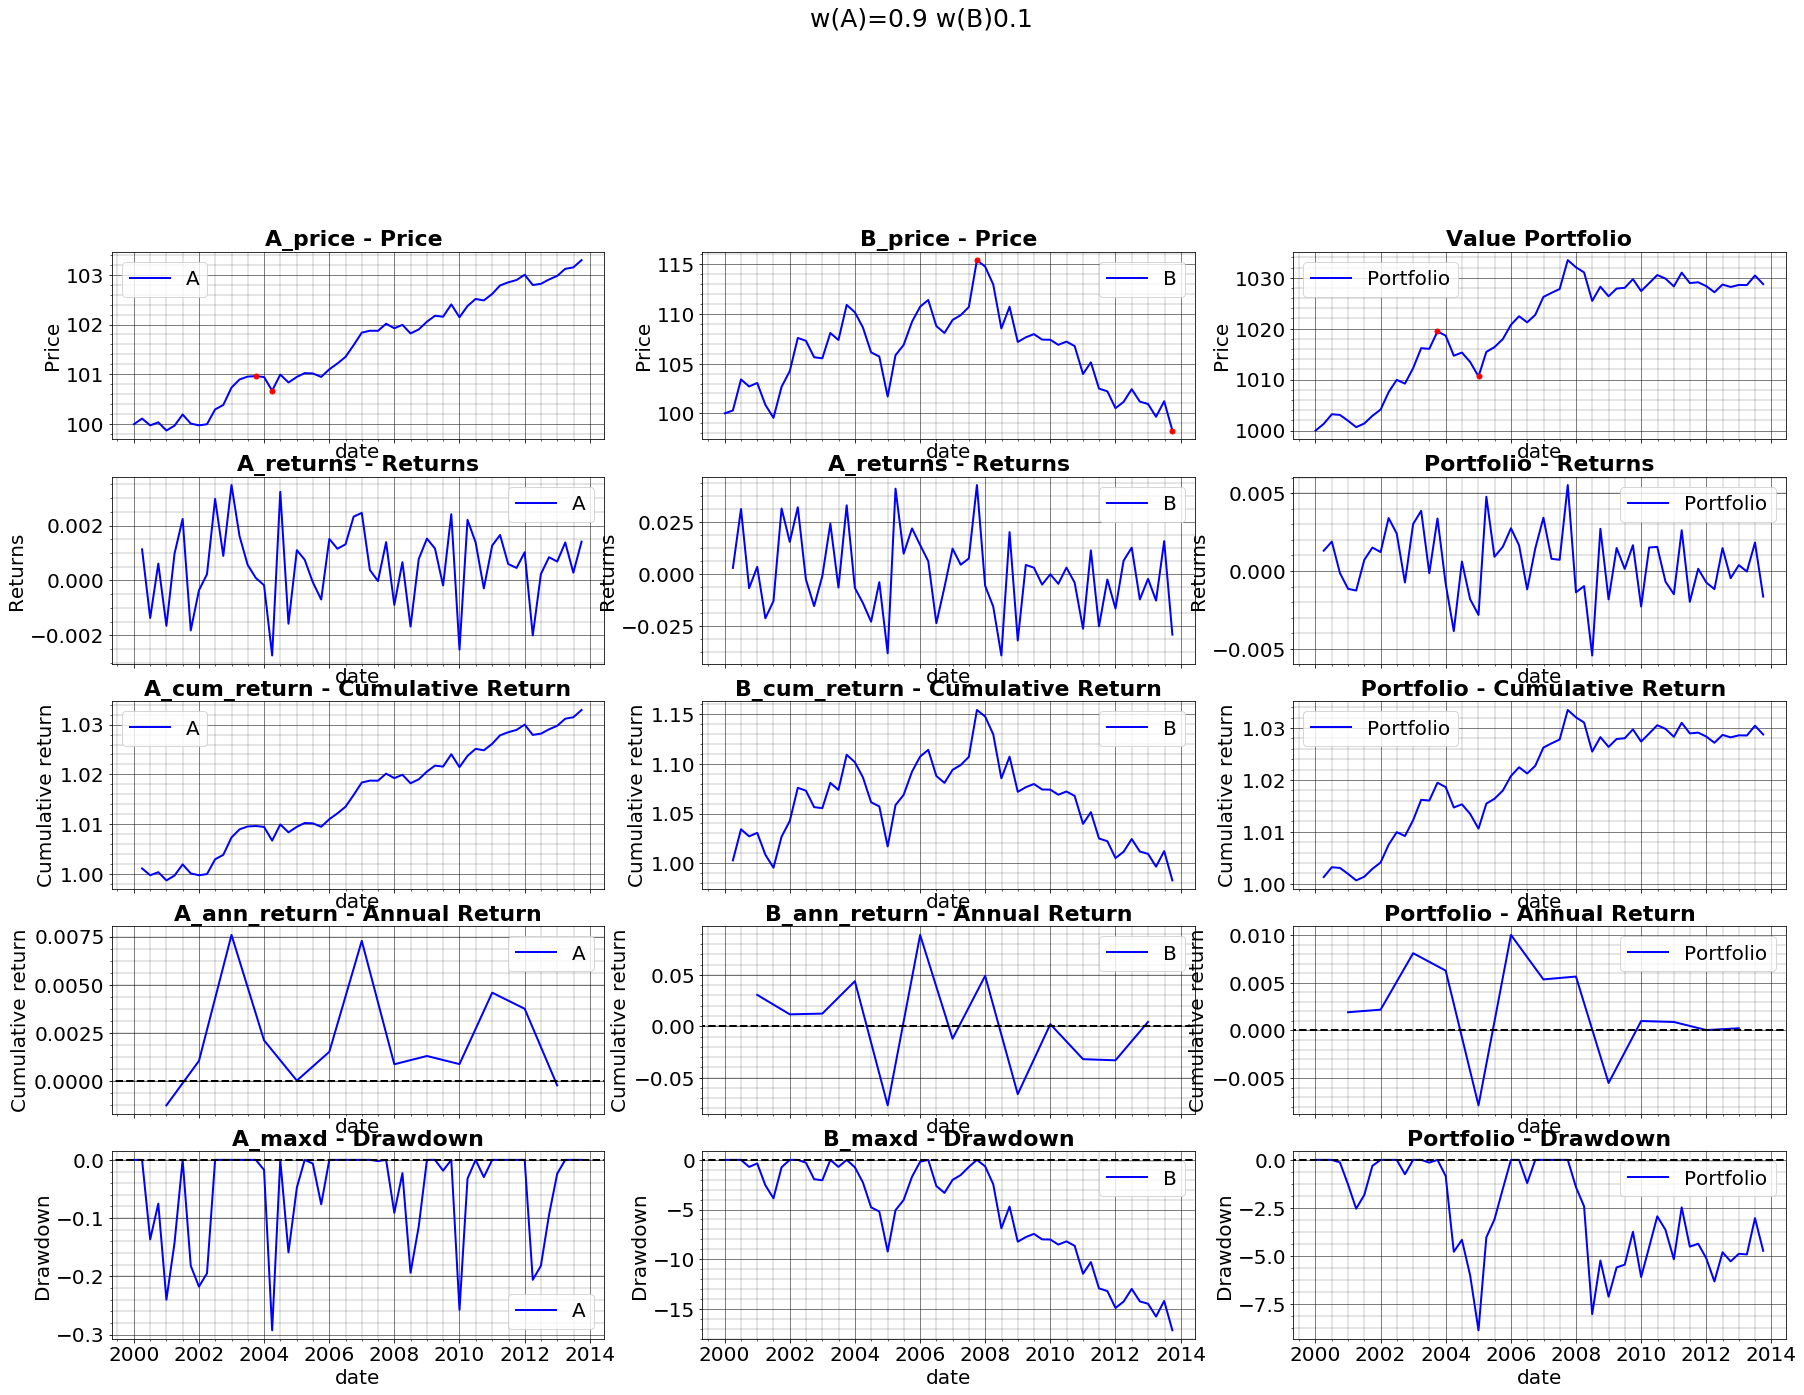

In [435]:
plot_price(df1)

# Algoritmo

In [488]:
### rebalanceos diarios con mismos pesos durante el periodo
df1=prices[["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return","A_maxd","B_maxd","A_ann_return","B_ann_return"]]
df1["A_returns_1"]=df1["A_returns"]+1
df1["B_returns_1"]=df1["B_returns"]+1
#df1["Port"]=df1["A_returns_p"]+df1["B_returns_p"]
df1['Portfolio_evolution'] = np.nan
df1['A_returns_p'] = np.nan
df1['B_returns_p'] = np.nan
df1['Port'] = np.nan
df1["Port_returns"]=np.nan
df1["Port_cum_return"]=np.nan
df1["Port_ann_return"]=np.nan
df1["Port_maxd"]=np.nan

w_a1=.8
w_b1=.2
dates_=list(df1.index)
for i in range(len(dates_)):
    if i>0:
        
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*w_a1
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*w_b1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        
        aux=df1.loc[dates_[i]]
        df1.loc[dates_[i]]['Portfolio_evolution']=df1.loc[dates_[i-1]]['Portfolio_evolution']*df1.loc[dates_[i]]["Port"]
        
        portfolio=pd.DataFrame(df1.loc[:dates_[i]]['Portfolio_evolution'])
        portfolio.columns=["Portfolio"]

        df1.loc[dates_[i]]["Port_returns"]=get_return(portfolio).tail(1)["Portfolio"][0]
        df1.loc[dates_[i]]["Port_cum_return"]= get_return_cum(portfolio).tail(1)["Portfolio"][0]
        df1.loc[dates_[i]]["Port_ann_return"]=get_return_annual(portfolio).tail(1)["Portfolio"][0]
        df1.loc[dates_[i]]["Port_maxd"]=get_roll_drawdown(portfolio.dropna()).tail(1)["Portfolio"][0]
        
        ## diferencias de retornos:
        R_A=df1.loc[dates_[i]]["A_returns_1"]
        R_B=df1.loc[dates_[i]]["B_returns_1"]
        R_P=df1.loc[dates_[i]]["Port_cum_return"]
        ## NUMERO DE VECES DONDE LOS RETORNOS FUERON MAYOR QUE CERO
        nret_A_positivos=sum(df1.loc[:dates_[i]]["A_returns"]>0)#/len(df_opt["A_returns"])
        nret_B_positivos=sum(df1.loc[:dates_[i]]["B_returns"]>0)#/len(df_opt["B_returns"])
        nret_Port_positivos=sum(df1["Port_returns"]>0)#/len(df_opt["Port_returns"])

        SA1=(R_A-R_P)*10
        SA2=nret_A_positivos-nret_Port_positivos
        SB1=(R_B-R_P)*10
        SB2=nret_B_positivos-nret_Port_positivos

        #SA1+SA2,SB1+SB2
        #w_b1=sigmoid(SB1+SB2) #1-w_a1#
        #w_a1=1-w_b1#sigmoid(SA1+SA2)
        #w_b1=1-w_a1#sigmoid(SB1+SB2)
        w_a1=sigmoid((R_A-R_B)*10+(nret_A_positivos-nret_B_positivos))
        w_b1=1-w_a1
        

        print(w_a1,w_b1)
        
        
        
    else:
        df1.loc[dates_[i]]["A_returns_p"]=df1.loc[dates_[i]]["A_returns_1"]*w_a1
        df1.loc[dates_[i]]["B_returns_p"]=df1.loc[dates_[i]]["B_returns_1"]*w_b1
        df1.loc[dates_[i]]["Port"]=df1.loc[dates_[i]]["A_returns_p"]+df1.loc[dates_[i]]["B_returns_p"]
        df1.loc[dates_[i]]['Portfolio_evolution']=1000

'''portfolio=pd.DataFrame(df1['Portfolio_evolution'])
portfolio.columns=["Portfolio"]

df1["Port_returns"]=get_return(portfolio)
df1["Port_cum_return"]= get_return_cum(portfolio)
df1["Port_ann_return"]=get_return_annual(portfolio)
df1["Port_maxd"]=get_roll_drawdown(portfolio.dropna())
df1.head()'''

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

0.5071282283255123 0.4928717716744877
0.48212048600282625 0.5178795139971737
0.7338117039095128 0.2661882960904872
0.8815373142255385 0.1184626857744615
0.8858832974187536 0.1141167025812464
0.87754457346855 0.12245542653145003
0.7292196848205478 0.2707803151794522
0.7284800824813157 0.2715199175186843
0.4915080498632699 0.5084919501367301
0.4864406365603651 0.5135593634396349
0.2618022545559853 0.7381977454440147
0.2595260036419687 0.7404739963580313
0.26443042981580855 0.7355695701841914
0.2824467004385575 0.7175532995614424
0.27556709386811734 0.7244329061318826
0.5065766716525324 0.4934233283474676
0.7444850929714111 0.2555149070285889
0.49760900734143165 0.5023909926585683
0.7325262617609809 0.2674737382390191
0.49480821685367193 0.5051917831463281
0.2624984759256991 0.7375015240743009
0.5009954710379041 0.4990045289620959
0.7366916685196538 0.26330833148034616
0.7380334609148133 0.26196653908518674
0.8812691219962424 0.11873087800375759
0.7227079825299918 0.2772920174700082
0.735

0.5120752967661248 0.48792470323387516
0.5032921537943372 0.4967078462056628
0.7380554048207688 0.2619445951792312
0.729086913689183 0.270913086310817
0.8822935941202109 0.11770640587978909
0.7181941583151292 0.2818058416848708
0.7309638523768143 0.26903614762318573
0.884019316045472 0.11598068395452799
0.9528638604498256 0.04713613955017437
0.8802832722123825 0.11971672778761755
0.8830290718029568 0.11697092819704324
0.885168535385824 0.11483146461417604
0.7183066530065564 0.2816933469934436
0.4992788822127525 0.5007211177872475
0.26619315749171274 0.7338068425082873
0.5119462639472027 0.48805373605279734
0.5042378088162941 0.4957621911837059
0.5171986027046691 0.4828013972953309
0.7403522587726148 0.2596477412273852
0.7271505677009993 0.2728494322990007
0.49007529711304104 0.5099247028869589
0.49934080125184144 0.5006591987481586
0.4965110739035194 0.5034889260964805
0.7327983116236296 0.26720168837637037
0.49587483548366484 0.5041251645163352
0.5118593407453138 0.4881406592546862
0.

0.11911557369615303 0.880884426303847
0.046804352580012115 0.9531956474199879
0.04764572872765243 0.9523542712723476
0.04722639386680349 0.9527736061331965
0.12241292502532042 0.8775870749746796
0.12431771741845159 0.8756822825815485
0.11627513874534978 0.8837248612546502
0.12131302748356618 0.8786869725164338
0.2714992216324822 0.7285007783675178
0.2664381798025553 0.7335618201974448
0.11868804892043058 0.8813119510795694
0.04581400019638121 0.9541859998036188
0.046057889396111856 0.9539421106038881
0.01776449211424103 0.982235507885759
0.018570099757787978 0.981429900242212
0.048173944505474214 0.9518260554945258
0.04811091390233025 0.9518890860976698
0.04741226349063582 0.9525877365093642
0.04806462856391057 0.9519353714360894
0.04869573062989527 0.9513042693701047
0.017455236347713312 0.9825447636522867
0.006591453619105758 0.9934085463808943
0.018542888771455494 0.9814571112285445
0.01784969048136092 0.9821503095186391
0.017971675301686446 0.9820283246983136
0.017763876453248634 0

8.375620405260652e-07 0.9999991624379595
2.873359324783038e-07 0.9999997126640675
8.61021687654816e-07 0.9999991389783124
8.059953209849859e-07 0.999999194004679
8.297654965452035e-07 0.9999991702345035
3.047483038752083e-07 0.9999996952516961
3.078349112884541e-07 0.9999996921650887
2.98040009658249e-07 0.9999997019599903
3.041364124781485e-07 0.9999996958635875
1.117025539448129e-07 0.999999888297446
1.1807449916392073e-07 0.9999998819255008
1.1911955456478134e-07 0.9999998808804454
1.1293983023918896e-07 0.9999998870601697
3.1519626471451106e-07 0.9999996848037352
1.1233635777500817e-07 0.9999998876636422
1.1602126399370196e-07 0.999999883978736
1.1737453931478312e-07 0.9999998826254607
1.1355731336320446e-07 0.9999998864426867
3.0897325593186906e-07 0.999999691026744
8.429780553501692e-07 0.9999991570219446
8.597046163165529e-07 0.9999991402953837
8.187175780498389e-07 0.9999991812824219
8.181383219137986e-07 0.9999991818616781
8.320523027080418e-07 0.9999991679476973
8.50281125347

5.8322942823730725e-06 0.9999941677057176
6.126754029567197e-06 0.9999938732459704
5.905914137876531e-06 0.9999940940858622
6.252353467554827e-06 0.9999937476465325
6.188644349052543e-06 0.9999938113556509
1.7002275846924178e-05 0.9999829977241531
1.6291847842896415e-05 0.9999837081521571
1.6161816805164206e-05 0.9999838381831948
1.7458785728045986e-05 0.999982541214272
1.6447962711072123e-05 0.999983552037289
1.6310273422734332e-05 0.9999836897265773
1.644939653789376e-05 0.9999835506034621
6.049461608962745e-06 0.999993950538391
2.205974005134985e-06 0.9999977940259949
7.997346082707248e-07 0.9999992002653917
8.055082404948479e-07 0.9999991944917596
8.392288028443144e-07 0.9999991607711971
8.45018325298797e-07 0.9999991549816747
2.289257970623083e-06 0.9999977107420294
6.170251769940037e-06 0.99999382974823
1.714107283626609e-05 0.9999828589271638
4.728604263712031e-05 0.9999527139573628
1.652423223227329e-05 0.9999834757677677
1.6661115039997905e-05 0.99998333888496
4.66732392361272

9.929560012096622e-11 0.9999999999007044
2.9419856890144104e-10 0.9999999997058014
2.8485712381556354e-10 0.9999999997151429
2.928159713603036e-10 0.999999999707184
2.8467709125807105e-10 0.9999999997153229
7.943942559049113e-10 0.9999999992056058
7.585903665166163e-10 0.9999999992414096
2.680892892662371e-10 0.9999999997319107
2.7836024954561846e-10 0.9999999997216398
2.8985441321653967e-10 0.9999999997101456
2.8400655116054037e-10 0.9999999997159934
2.7193800015945605e-10 0.999999999728062
2.6846166538381407e-10 0.9999999997315383
2.8762752166632663e-10 0.9999999997123725
2.815371553460439e-10 0.9999999997184629
2.786420862629422e-10 0.9999999997213579
9.955735057381401e-11 0.9999999999004426
1.0098864688829125e-10 0.9999999998990113
1.0510057127135682e-10 0.9999999998948994
3.518193512750883e-11 0.999999999964818
1.3155767705008794e-11 0.9999999999868442
4.943708003124073e-12 0.9999999999950563
5.180698800952837e-12 0.9999999999948193
5.041758850028187e-12 0.9999999999949583
1.39941

0.0003486997140809397 0.9996513002859191
0.0009243715168982336 0.9990756284831017
0.0009131760704568565 0.9990868239295432
0.002498007900898529 0.9975019920991015
0.007313772805173272 0.9926862271948267
0.002397871872050677 0.9976021281279494
0.002434156429222209 0.9975658435707778
0.0009032939184992278 0.9990967060815008
0.0003344564185523515 0.9996655435814477
0.00033514748796175623 0.9996648525120383
0.00034671303514814846 0.9996532869648519
0.0003391694998059217 0.999660830500194
0.0003163824077956092 0.9996836175922044
0.000921650200564103 0.9990783497994359
0.0003303673697877163 0.9996696326302122
0.0009590254212427174 0.9990409745787573
0.0009017747907364918 0.9990982252092635
0.0008835451683667341 0.9991164548316332
0.0009233180481112861 0.9990766819518887
0.0009010837607372869 0.9990989162392627
0.00032337236470464224 0.9996766276352954
0.0009356489901253317 0.9990643510098747
0.0009125350847260926 0.9990874649152739
0.002518240511935009 0.997481759488065
0.002509535752020926 

4.5027611059879435e-05 0.9999549723889402
4.679360438388633e-05 0.9999532063956161
4.2901424670132327e-05 0.9999570985753299
4.5868100563054e-05 0.9999541318994369
1.6584239199299883e-05 0.9999834157608007
5.936806944375032e-06 0.9999940631930556
2.2383487234135334e-06 0.9999977616512766
2.1962225582812502e-06 0.9999978037774417
8.307918541764009e-07 0.9999991692081458
2.32476799376449e-06 0.9999976752320062
7.982635717026302e-07 0.9999992017364283
3.0423126558613717e-07 0.9999996957687344
8.48781761124509e-07 0.9999991512182389
2.3108956740303064e-06 0.999997689104326
8.094272458636431e-07 0.9999991905727541
8.470519144935837e-07 0.9999991529480855
2.28641217811408e-06 0.9999977135878219
2.243673871375717e-06 0.9999977563261286
7.98282286053e-07 0.999999201717714
2.94563377376651e-07 0.9999997054366226
1.0827494264685461e-07 0.9999998917250573
3.078957763838199e-07 0.9999996921042236
1.074146324653888e-07 0.9999998925853676
1.1129434825566544e-07 0.9999998887056517
1.1097759962534703e

1.554220641323996e-08 0.9999999844577936
4.224430798550796e-08 0.9999999577556921
4.235904325000086e-08 0.9999999576409567
1.1414134344967427e-07 0.9999998858586565
1.1332051222512678e-07 0.9999998866794878
1.1310784032040773e-07 0.9999998868921597
4.0168294653302576e-08 0.9999999598317053
3.950199347234139e-08 0.9999999604980065
1.5179937226958098e-08 0.9999999848200628
5.572597189670437e-09 0.9999999944274028
5.7492082442260255e-09 0.9999999942507918
1.5583873096160062e-08 0.9999999844161269
5.348388578533161e-09 0.9999999946516114
1.5810514146850075e-08 0.9999999841894859
5.570417203986191e-09 0.9999999944295828
5.220128406816677e-09 0.9999999947798716
5.5540664095046544e-09 0.9999999944459336
5.745863186840313e-09 0.9999999942541368
2.009536786792549e-09 0.9999999979904632
5.770423889104009e-09 0.9999999942295761
5.4571868805332875e-09 0.9999999945428131
2.0240974497049625e-09 0.9999999979759026
5.769367941454552e-09 0.999999994230632
1.5516882227294245e-08 0.9999999844831178
1.541

8.25596867582378e-07 0.9999991744031325
2.330955125057073e-06 0.999997669044875
2.239373688313063e-06 0.9999977606263117
8.119746835408132e-07 0.9999991880253165
8.28177222095152e-07 0.9999991718227779
2.2800570538622558e-06 0.9999977199429462
2.289309372517923e-06 0.9999977106906275
8.074001142191348e-07 0.9999991925998858
2.3075339175842296e-06 0.9999976924660824
2.2919530393311148e-06 0.9999977080469606
2.2358649710925656e-06 0.9999977641350289
6.53687172260706e-06 0.9999934631282774
2.251047639758022e-06 0.9999977489523603
8.079745585095927e-07 0.9999991920254415
8.219828687185452e-07 0.9999991780171312
8.132162419334296e-07 0.9999991867837581
2.2704202496518647e-06 0.9999977295797503
8.269135230461978e-07 0.9999991730864769
2.9628953190117954e-07 0.9999997037104681
8.797319685055124e-07 0.9999991202680315
3.018000662244396e-07 0.9999996981999337
1.1050568512167191e-07 0.9999998894943148
3.203303590850665e-07 0.9999996796696409
8.451681053686305e-07 0.9999991548318946
2.32863044812

0.00035653856299757835 0.9996434614370024
0.00012122897830325836 0.9998787710216968
0.00012344872320667433 0.9998765512767933
0.0001228103163761877 0.9998771896836238
0.00012322855654767087 0.9998767714434523
4.37927383855797e-05 0.9999562072616144
1.633279708857193e-05 0.9999836672029114
6.0536940608255405e-06 0.9999939463059392
6.049374213294775e-06 0.9999939506257867
6.233728606669884e-06 0.9999937662713934
1.6805958293993904e-05 0.999983194041706
5.926363049213775e-06 0.9999940736369508
6.028904824135548e-06 0.9999939710951758
6.220941606864503e-06 0.9999937790583932
6.243606613901782e-06 0.9999937563933861
5.937299162614766e-06 0.9999940627008373
1.6776617747277878e-05 0.9999832233822528
1.65162611531929e-05 0.9999834837388468
1.7238403864591485e-05 0.9999827615961354
4.7920572974991416e-05 0.999952079427025
0.00012364704559054773 0.9998763529544095
4.3839351508857826e-05 0.9999561606484911
4.6081869246404946e-05 0.9999539181307536
0.00012407626564687357 0.9998759237343531
0.00013

0.007037989879308709 0.9929620101206913
0.0024473696215055957 0.9975526303784944
0.00680512735390238 0.9931948726460976
0.01815475284874701 0.981845247151253
0.018018431082520932 0.9819815689174791
0.04957175030058587 0.9504282496994141
0.12028175614006706 0.8797182438599329
0.11744039794247396 0.882559602057526
0.12068715286483896 0.879312847135161
0.11552651003954166 0.8844734899604584
0.11943247214363109 0.8805675278563689
0.12231721531596715 0.8776827846840328
0.27022952684070467 0.7297704731592953
0.503632538155047 0.49636746184495295
0.7375436180959359 0.26245638190406406
0.49737036245120614 0.5026296375487939
0.5121096678982479 0.48789033210175214
0.502055301276039 0.49794469872396097
0.4957216924961683 0.5042783075038317
0.5096979940922141 0.49030200590778594
0.5037573001394863 0.4962426998605137
0.501002447050754 0.49899755294924597
0.7352796004840109 0.26472039951598914
0.49110337710995094 0.5088966228900491
0.7364426694037466 0.2635573305962534
0.8866660363096825 0.113333963

0.9999991441101239 8.558898760835376e-07
0.9999976708985674 2.329101432607672e-06
0.9999936959047265 6.304095273468313e-06
0.9999938103302755 6.1896697245433785e-06
0.9999936425672298 6.357432770220939e-06
0.9999977911118954 2.2088881046489206e-06
0.9999976952490391 2.3047509608575822e-06
0.9999937563892126 6.2436107873820035e-06
0.9999977811546253 2.218845374657441e-06
0.999993741193925 6.2588060749657615e-06
0.9999830414524854 1.6958547514600575e-05
0.9999938989702185 6.101029781491185e-06
0.9999942372728514 5.762727148583835e-06
0.999997804549911 2.195450088948725e-06
0.999997790429125 2.2095708750446974e-06
0.9999978531248729 2.1468751271180864e-06
0.9999976938603893 2.306139610719349e-06
0.9999976300685094 2.369931490608934e-06
0.9999936260282307 6.373971769280118e-06
0.9999830714259317 1.6928574068320046e-05
0.9999837380372903 1.6261962709651634e-05
0.9999942022628958 5.7977371041850745e-06
0.9999831767979139 1.6823202086069244e-05
0.9999938938039069 6.106196093091931e-06
0.99999

0.9999997018952385 2.9810476154246146e-07
0.9999996888570712 3.111429287550038e-07
0.9999997063064433 2.93693556696617e-07
0.9999991405272064 8.594727936017676e-07
0.999997734217564 2.2657824360061696e-06
0.9999992107806017 7.892193982783624e-07
0.9999991737700781 8.262299219241598e-07
0.9999991896714973 8.103285027427631e-07
0.9999977024595437 2.2975404563307933e-06
0.9999937288446838 6.271155316150967e-06
0.9999940294587742 5.97054122575269e-06
0.9999977937687545 2.2062312454718125e-06
0.999999178999509 8.210004910358393e-07
0.9999991457268381 8.542731618765842e-07
0.9999991787147023 8.212852976585694e-07
0.9999996977674152 3.022325848478502e-07
0.999999697241863 3.0275813700519905e-07
0.9999997110434755 2.88956524485684e-07
0.999999142098578 8.579014220133629e-07
0.9999992100344216 7.899655783960569e-07
0.9999977221680174 2.277831982588907e-06
0.9999977158496809 2.284150319109557e-06
0.9999991839572557 8.160427442671647e-07
0.9999991265787754 8.734212245675721e-07
0.999999696377234 

0.9999999943204114 5.679588577223171e-09
0.9999999941874311 5.812568870666723e-09
0.99999998432694 1.5673059960974456e-08
0.9999999945021139 5.497886146343944e-09
0.9999999979490894 2.050910552497953e-09
0.9999999992709734 7.290266168524795e-10
0.9999999978603673 2.139632693243243e-09
0.9999999978940013 2.105998708756829e-09
0.9999999979626784 2.037321644721146e-09
0.9999999979901926 2.0098074315910708e-09
0.9999999979294261 2.0705739345316942e-09
0.9999999943180369 5.68196312222824e-09
0.9999999942106184 5.789381640752822e-09
0.999999994381459 5.618540965812713e-09
0.9999999944054305 5.594569474354216e-09
0.9999999944442131 5.555786941613405e-09
0.9999999979510494 2.04895056477028e-09
0.9999999992781019 7.218980968559663e-10
0.9999999978085501 2.191449910426968e-09
0.999999997969816 2.030184020895831e-09
0.999999994319307 5.6806930270880684e-09
0.9999999944214513 5.57854873406427e-09
0.9999999845500498 1.54499502080796e-08
0.9999999845917806 1.5408219367074594e-08
0.9999999582696395 4

0.9999999999999647 3.530509218307998e-14
0.9999999999999647 3.530509218307998e-14
0.9999999999999876 1.2434497875801753e-14
0.9999999999999873 1.2656542480726785e-14
0.9999999999999956 4.440892098500626e-15
0.9999999999999984 1.5543122344752192e-15
0.9999999999999993 6.661338147750939e-16
0.9999999999999993 6.661338147750939e-16
0.9999999999999998 2.220446049250313e-16
0.9999999999999998 2.220446049250313e-16
0.9999999999999998 2.220446049250313e-16
0.9999999999999998 2.220446049250313e-16
0.9999999999999998 2.220446049250313e-16
0.9999999999999993 6.661338147750939e-16
0.9999999999999993 6.661338147750939e-16
0.9999999999999993 6.661338147750939e-16
0.9999999999999993 6.661338147750939e-16
0.9999999999999982 1.7763568394002505e-15
0.9999999999999951 4.884981308350689e-15
0.9999999999999869 1.3100631690576847e-14
0.9999999999999649 3.5083047578154947e-14
0.999999999999966 3.397282455352979e-14
0.9999999999999873 1.2656542480726785e-14
0.9999999999999873 1.2656542480726785e-14
0.9999999

0.9999999999999094 9.059419880941277e-14
0.9999999999997415 2.5845992013273644e-13
0.9999999999997473 2.5268676040468563e-13
0.9999999999999081 9.192646643896296e-14
0.9999999999997427 2.573496971081113e-13
0.9999999999993059 6.941114349956479e-13
0.9999999999997526 2.473576898864849e-13
0.999999999999289 7.109868249699502e-13
0.9999999999992939 7.061018436615996e-13
0.9999999999997498 2.502442697505103e-13
0.9999999999997378 2.62234678416462e-13
0.999999999999746 2.540190280342358e-13
0.9999999999997489 2.511324481702104e-13
0.9999999999997353 2.646771690706373e-13
0.9999999999997455 2.544631172440859e-13
0.9999999999997493 2.5068835896036035e-13
0.9999999999999094 9.059419880941277e-14
0.9999999999999094 9.059419880941277e-14
0.9999999999997344 2.6556534749033744e-13
0.9999999999999096 9.037215420448774e-14
0.9999999999999047 9.525713551283843e-14
0.9999999999997387 2.6134649999676185e-13
0.9999999999992903 7.096545573404001e-13
0.999999999999331 6.690203946391193e-13
0.9999999999992

'portfolio=pd.DataFrame(df1[\'Portfolio_evolution\'])\nportfolio.columns=["Portfolio"]\n\ndf1["Port_returns"]=get_return(portfolio)\ndf1["Port_cum_return"]= get_return_cum(portfolio)\ndf1["Port_ann_return"]=get_return_annual(portfolio)\ndf1["Port_maxd"]=get_roll_drawdown(portfolio.dropna())\ndf1.head()'

In [482]:
SA1,SA2,SB1,SB2

(0.2654309186640247, 52, 0.26352697216518006, 5)

0.001903946498844622

47

In [474]:
df1.Portfolio_evolution.head(20)

2000-01-03    1000.000000
2000-01-04     999.210818
2000-01-05     998.740493
2000-01-06    1479.462408
2000-01-07      44.669723
2000-01-10      89.105240
2000-01-11     178.510967
2000-01-12     356.924773
2000-01-13     712.204477
2000-01-14    1294.918575
2000-01-17      49.821328
2000-01-18      99.815747
2000-01-19     200.105697
2000-01-20     400.465442
2000-01-21     794.548694
2000-01-24     984.819042
2000-01-25     183.695014
2000-01-26     365.427499
2000-01-27     713.175165
2000-01-28     667.297462
Freq: B, Name: Portfolio_evolution, dtype: float64

In [490]:
df1.tail(10)

A_price    B_price  A_returns  B_returns  A_cum_return  \
2013-12-17  103.284674  97.182043   0.000142  -0.002739      1.032847   
2013-12-18  103.291237  97.263934   0.000064   0.000843      1.032912   
2013-12-19  103.281171  97.252054  -0.000097  -0.000122      1.032812   
2013-12-20  103.300913  97.244857   0.000191  -0.000074      1.033009   
2013-12-23  103.289338  96.843920  -0.000112  -0.004123      1.032893   
2013-12-24  103.285469  97.324477  -0.000037   0.004962      1.032855   
2013-12-25  103.290969  96.919773   0.000053  -0.004158      1.032910   
2013-12-26  103.272041  96.746498  -0.000183  -0.001788      1.032720   
2013-12-27  103.302771  96.633473   0.000298  -0.001168      1.033028   
2013-12-30  103.322805  96.633815   0.000194   0.000004      1.033228   

            B_cum_return    A_maxd     B_maxd  A_ann_return  B_ann_return  \
2013-12-17      0.971820 -0.035840 -20.321053           NaN           NaN   
2013-12-18      0.972639 -0.029277 -20.239161           NaN           NaN   
2013-12-19      0.972521 -0.039344 -20.251042           NaN           NaN   
2013-12-20      0.972449 -0.019602 -20.258238           NaN           NaN   
2013-12-23      0.968439 -0.031176 -20.659175           NaN           NaN   
2013-12-24      0.973245 -0.035046 -20.178619           NaN           NaN   
2013-12-25      0.969198 -0.029546 -20.583322           NaN           NaN   
2013-12-26      0.967465 -0.048473 -20.756598           NaN           NaN   
2013-12-27      0.966335 -0.017744 -20.869622           NaN           NaN   
2013-12-30      0.966338  0.000000 -20.869280           NaN           NaN   

            A_returns_1  B_returns_1  Portfolio_evolution  A_returns_p  \
2013-12-17     1.000142     0.997261          1045.664019     1.000142   
2013-12-18     1.000064     1.000843          1045.730464     1.000064   
2013-12-19     0.999903     0.999878          1045.628550     0.999903   
2013-12-20     1.000191     0.999926          1045.828421     1.000191   
2013-12-23     0.999888     0.995877          1045.711239     0.999888   
2013-12-24     0.999963     1.004962          1045.672065     0.999963   
2013-12-25     1.000053     0.995842          1045.727745     1.000053   
2013-12-26     0.999817     0.998212          1045.536120     0.999817   
2013-12-27     1.000298     0.998832          1045.847227     1.000298   
2013-12-30     1.000194     1.000004          1046.050054     1.000194   

            B_returns_p      Port  Port_returns  Port_cum_return  \
2013-12-17          0.0  1.000142      0.000142         1.045664   
2013-12-18          0.0  1.000064      0.000064         1.045730   
2013-12-19          0.0  0.999903     -0.000097         1.045629   
2013-12-20          0.0  1.000191      0.000191         1.045828   
2013-12-23          0.0  0.999888     -0.000112         1.045711   
2013-12-24          0.0  0.999963     -0.000037         1.045672   
2013-12-25          0.0  1.000053      0.000053         1.045728   
2013-12-26          0.0  0.999817     -0.000183         1.045536   
2013-12-27          0.0  1.000298      0.000298         1.045847   
2013-12-30          0.0  1.000194      0.000194         1.046050   

            Port_ann_return  Port_maxd  
2013-12-17        -0.000231 -75.625321  
2013-12-18        -0.000231 -75.558876  
2013-12-19        -0.000231 -75.660790  
2013-12-20        -0.000231 -75.460918  
2013-12-23        -0.000231 -75.578101  
2013-12-24        -0.000231 -75.617275  
2013-12-25        -0.000231 -75.561594  
2013-12-26        -0.000231 -75.753220  
2013-12-27        -0.000231 -75.442113  
2013-12-30        -0.000231 -75.239285

/home/ubuntu/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Retorno de Portfolio: 4.61
Drawdown Portfolio: -102.58
# años con retornos anuales positivos : 8/14


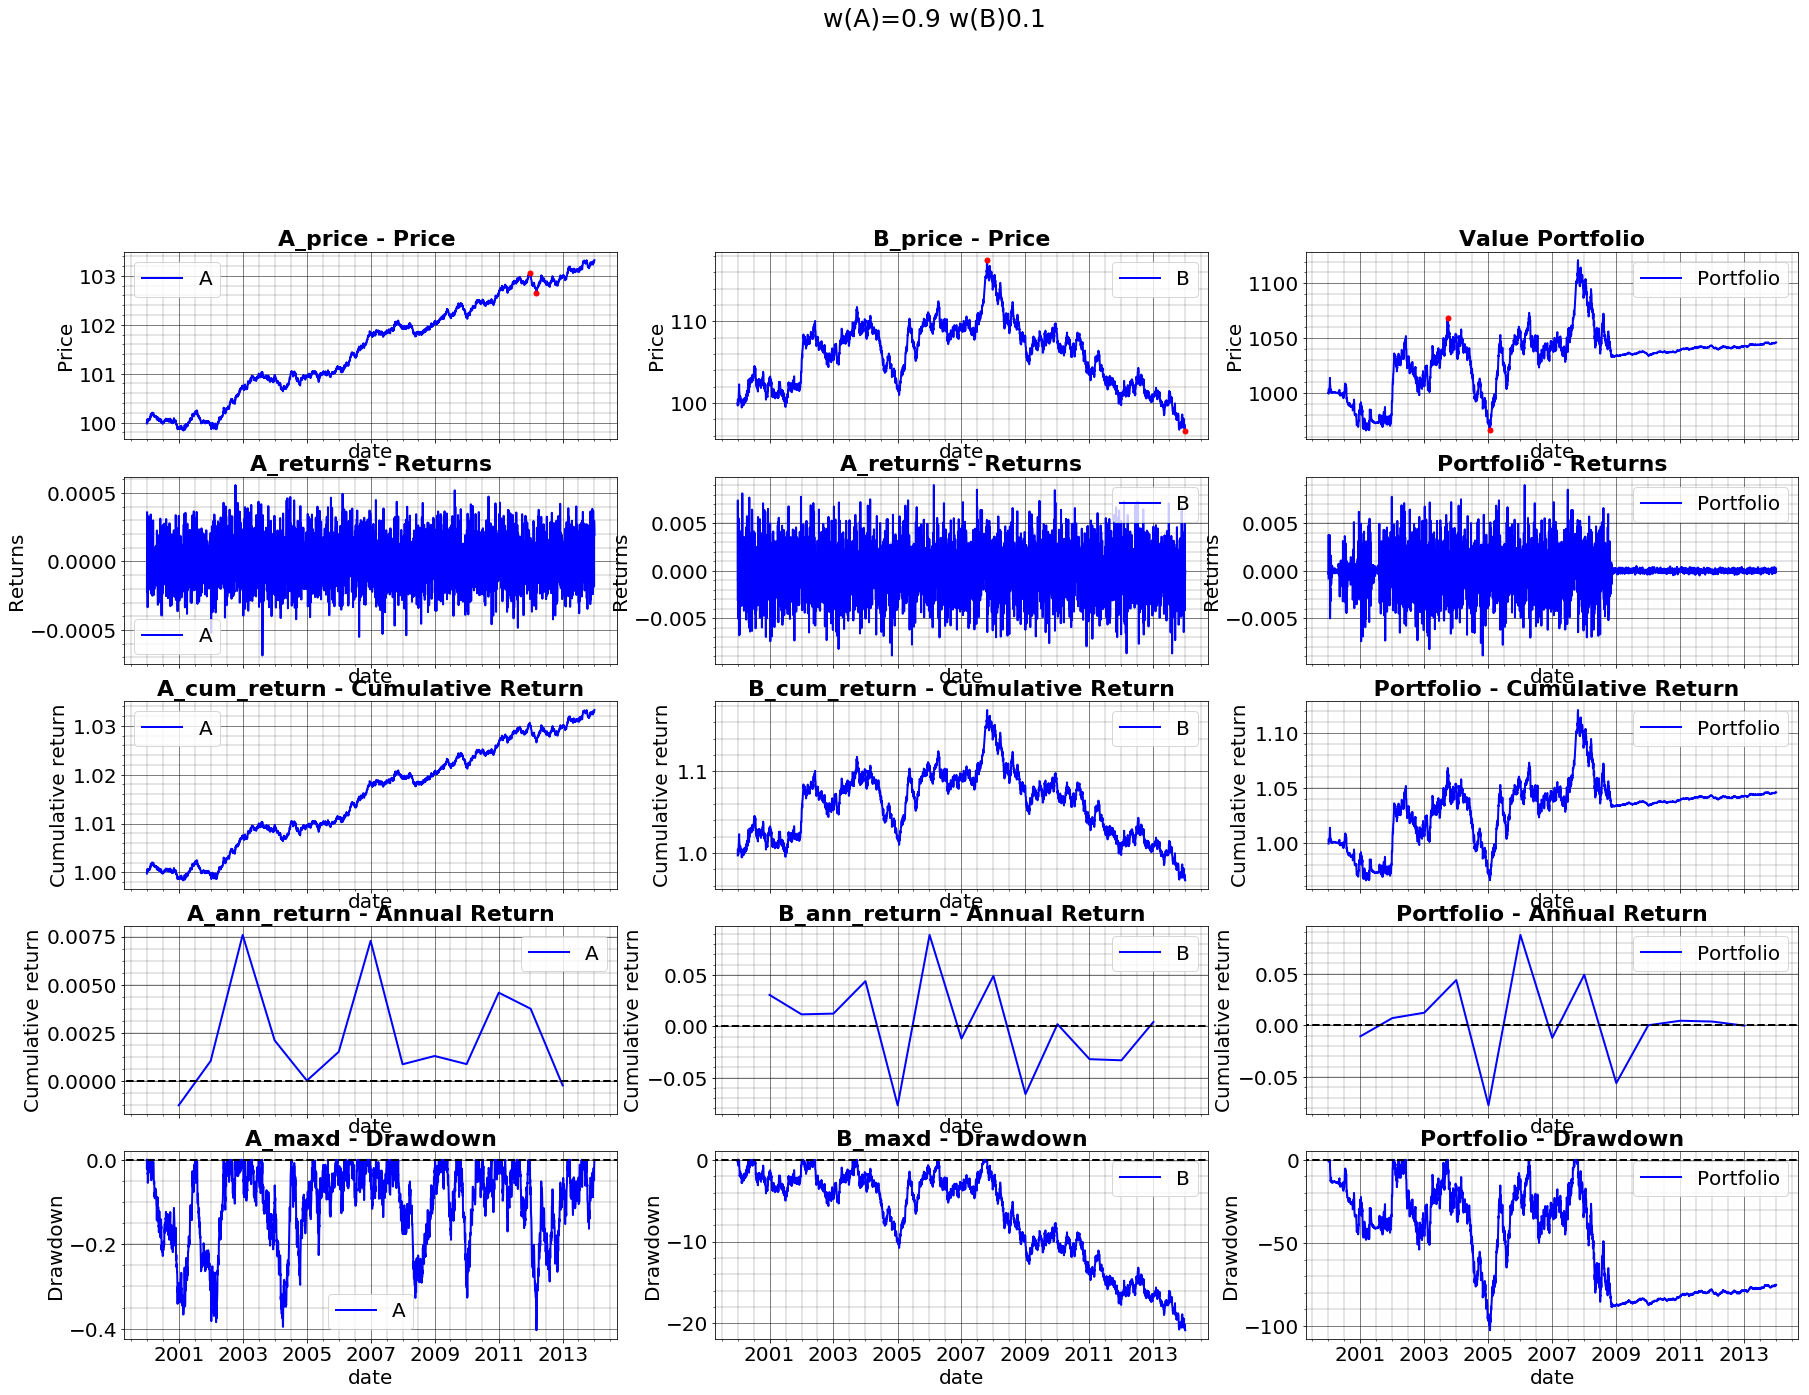

In [489]:
plot_price(df1)

In [478]:
df1.Port_ann_return.drop_duplicates()

2000-01-03         NaN
2001-01-01   -0.002677
2002-01-01    0.001165
2003-01-01    0.007323
2004-01-01    0.002183
2005-01-03   -0.000866
2006-01-02    0.001542
2007-01-01    0.007271
2008-01-01    0.000872
2009-01-01    0.001284
2010-01-01    0.000874
2011-01-03    0.004578
2012-01-02    0.003735
2013-01-01   -0.000229
Name: Port_ann_return, dtype: float64

In [184]:
dates_[0]
prices.loc[dates_[1]]
w_a=.5
w_b=.5
for i in range(len(dates_)):
    ((df_opt.tail(1)["A_returns"][0] + 1 )*w_a+(df_opt.tail(1)["B_returns"][0] +  1 )*w_b)*(I)
    if i>0:
        df_opt=df_aux.loc[:dates_[4]]
        
        ## calcular returns and cum returns de portfolio con los pesos dados
        ((df_opt.tail(1)["A_returns"][0] + 1 )*w_a+
         (df_opt.tail(1)["B_returns"][0] +  1 )*w_b)   *(df_opt.tail(1)["A_returns"][0])

        ## diferencias de retornos:
        R_A_P=df_opt.tail(1)["A_cum_return"][0]-df_opt.tail(1)["Port_cum_return"][0]
        R_B_P=df_opt.tail(1)["B_cum_return"][0]-df_opt.tail(1)["Port_cum_return"][0]
        R_B_P,R_A_P
        ## NUMERO DE VECES DONDE LOS RETORNOS FUERON MAYOR QUE CERO
        nret_A_positivos=sum(df_opt["A_returns"]>0)#/len(df_opt["A_returns"])
        nret_B_positivos=sum(df_opt["B_returns"]>0)#/len(df_opt["B_returns"])
        nret_Port_positivos=sum(df_opt["Port_returns"]>0)#/len(df_opt["Port_returns"])

        SA1=R_A_P
        SA2=nret_A_positivos-nret_Port_positivos
        SB1=R_B_P
        SB2=nret_B_positivos-nret_Port_positivos

        SA1+SA2,SB1+SB2
        w_a_opt=sigmoid(SA1+SA2)
        w_b_opt=sigmoid(SB1+SB2)

        w_a_opt,w_b_opt
        
  
prices["A_wa"]=prices["A_cum_return"]*w_a
prices["B_wb"]=prices["B_cum_return"]*w_b
prices["Portfolio_evolution"]=(prices["A_wa"]+prices["B_wb"])*I
portfolio=pd.DataFrame(prices["Portfolio_evolution"])
portfolio.columns=["Portfolio"]

prices["Port_returns"]=get_return(portfolio)
prices["Port_cum_return"]= get_return_cum(portfolio)
        

A_price                 99.978111
B_price                 99.692963
A_returns               -0.000219
B_returns               -0.003070
A_cum_return             0.999781
B_cum_return             0.996930
A_maxd                  -0.021889
B_maxd                  -0.307037
A_ann_return                  NaN
B_ann_return                  NaN
A_wa                     0.899803
B_wb                     0.099693
Portfolio_evolution    999.495966
Port_returns                  NaN
Port_cum_return               NaN
Port_ann_return               NaN
Port_maxd                0.000000
Name: 2000-01-04 00:00:00, dtype: float64

In [192]:
prices.loc[:dates_[2]]["A_cum_return"]

2000-01-03         NaN
2000-01-04    0.999781
2000-01-05    1.000052
Freq: B, Name: A_cum_return, dtype: float64

In [193]:
prices.loc[:dates_[2]]["B_cum_return"]

2000-01-03         NaN
2000-01-04    0.996930
2000-01-05    1.004333
Freq: B, Name: B_cum_return, dtype: float64

In [194]:
prices.loc[:dates_[2]]["Port_cum_return"]

2000-01-03         NaN
2000-01-04         NaN
2000-01-05    1.000984
Freq: B, Name: Port_cum_return, dtype: float64

In [198]:
#df_opt=prices[["A_cum_return","B_cum_return","Port_cum_return","A_returns","B_returns","Port_returns"]]
df_opt=prices.loc[:dates_[4]]

## diferencias de retornos:
R_A_P=df_opt.tail(1)["A_cum_return"][0]-df_opt.tail(1)["Port_cum_return"][0]
R_B_P=df_opt.tail(1)["B_cum_return"][0]-df_opt.tail(1)["Port_cum_return"][0]
R_B_P,R_A_P
## NUMERO DE VECES DONDE LOS RETORNOS FUERON MAYOR QUE CERO
nret_A_positivos=sum(df_opt["A_returns"]>0)#/len(df_opt["A_returns"])
nret_B_positivos=sum(df_opt["B_returns"]>0)#/len(df_opt["B_returns"])
nret_Port_positivos=sum(df_opt["Port_returns"]>0)#/len(df_opt["Port_returns"])

SA1=R_A_P
SA2=nret_A_positivos-nret_Port_positivos
SB1=R_B_P
SB2=nret_B_positivos-nret_Port_positivos

SA1+SA2,SB1+SB2
w_a_opt=sigmoid(SA1+SA2)
w_b_opt=sigmoid(SB1+SB2)

w_a_opt,w_b_opt

(0.4998197787377171, 0.1193543423062531)

In [170]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

0.5053410024650781

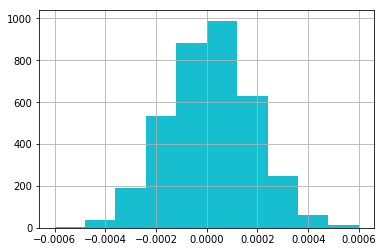

In [87]:
#prices["A_price"][0:25].plot()
for i in range(0,3600,15):
    prices["A_returns"][0:i].hist(bins=10,range=(-.0006,.0006))
#prices["A_returns"][20:25].hist(bins=10,range=(-.0006,.0006))

In [16]:
prices[["A_ann_return","B_ann_return","Port_ann_return"]].dropna()

A_ann_return  B_ann_return  Port_ann_return
2001-12-31      0.002947     -0.024897         0.000293
2002-12-31      0.006271      0.007378         0.006374
2003-12-31     -0.000191      0.081935         0.007446
2004-12-31      0.002015     -0.019424        -0.000126
2005-12-30      0.005344      0.015826         0.006370
2006-12-29      0.003950      0.049527         0.008455
2007-12-31      0.005322     -0.013980         0.003336
2008-12-31      0.007323      0.111237         0.017830
2009-12-31      0.006353     -0.023481         0.003060
2010-12-31      0.003062     -0.006989         0.001982
2011-12-30     -0.001704     -0.018259        -0.003467
2012-12-31      0.008158      0.143853         0.022395

In [152]:
prices.head()

A_price     B_price  A_returns  B_returns  A_cum_return  \
2000-01-03  100.000000  100.000000        NaN        NaN           NaN   
2000-01-04   99.978111   99.692963  -0.000219  -0.003070      0.999781   
2000-01-05  100.005187  100.433251   0.000271   0.007426      1.000052   
2000-01-06  100.041193  100.328317   0.000360  -0.001045      1.000412   
2000-01-07  100.051568  100.267796   0.000104  -0.000603      1.000516   

            B_cum_return    A_maxd    B_maxd  A_ann_return  B_ann_return  \
2000-01-03           NaN  0.000000  0.000000           NaN           NaN   
2000-01-04      0.996930 -0.021889 -0.307037           NaN           NaN   
2000-01-05      1.004333  0.000000  0.000000           NaN           NaN   
2000-01-06      1.003283  0.000000 -0.104934           NaN           NaN   
2000-01-07      1.002678  0.000000 -0.165454           NaN           NaN   

                A_wa      B_wb  Portfolio_evolution  Port_returns  \
2000-01-03       NaN       NaN                  NaN           NaN   
2000-01-04  0.899803  0.099693           999.495966           NaN   
2000-01-05  0.900047  0.100433          1000.479938      0.000984   
2000-01-06  0.900371  0.100328          1000.699057      0.000219   
2000-01-07  0.900464  0.100268          1000.731909      0.000033   

            Port_cum_return  Port_ann_return  Port_maxd  
2000-01-03              NaN              NaN        NaN  
2000-01-04              NaN              NaN        0.0  
2000-01-05         1.000984              NaN        0.0  
2000-01-06         1.001204              NaN        0.0  
2000-01-07         1.001237              NaN        0.0

In [17]:
prices

A_price     B_price  A_returns  B_returns  A_cum_return  \
2000-01-03  100.000000  100.000000        NaN        NaN           NaN   
2000-01-04   99.982960  100.119234  -0.000170   0.001192      0.999830   
2000-01-05  100.007972  100.080576   0.000250  -0.000386      1.000080   
2000-01-06   99.998816  100.331246  -0.000092   0.002505      0.999988   
2000-01-07  100.013646  100.213817   0.000148  -0.001170      1.000136   
2000-01-10  100.032416  100.459929   0.000188   0.002456      1.000324   
2000-01-11  100.062494  100.082160   0.000301  -0.003760      1.000625   
2000-01-12  100.064599  100.511974   0.000021   0.004295      1.000646   
2000-01-13  100.067043  100.476450   0.000024  -0.000353      1.000670   
2000-01-14  100.048527  101.232969  -0.000185   0.007529      1.000485   
2000-01-17  100.009829  101.567356  -0.000387   0.003303      1.000098   
2000-01-18   99.997288  101.876074  -0.000125   0.003040      0.999973   
2000-01-19   99.991611  101.813500  -0.000057  -0.000614      0.999916   
2000-01-20   99.990983  101.758474  -0.000006  -0.000540      0.999910   
2000-01-21   99.966681  101.879766  -0.000243   0.001192      0.999667   
2000-01-24   99.978610  101.869128   0.000119  -0.000104      0.999786   
2000-01-25   99.988171  101.909438   0.000096   0.000396      0.999882   
2000-01-26   99.959090  101.940932  -0.000291   0.000309      0.999591   
2000-01-27   99.966274  102.053454   0.000072   0.001104      0.999663   
2000-01-28   99.986258  101.944851   0.000200  -0.001064      0.999863   
2000-01-31  100.006613  102.398433   0.000204   0.004449      1.000066   
2000-02-01   99.997788  102.436654  -0.000088   0.000373      0.999978   
2000-02-02  100.009920  102.727843   0.000121   0.002843      1.000099   
2000-02-03  100.014709  102.721068   0.000048  -0.000066      1.000147   
2000-02-04  100.025080  102.819426   0.000104   0.000958      1.000251   
2000-02-07   99.986189  102.647225  -0.000389  -0.001675      0.999862   
2000-02-08   99.976972  102.869828  -0.000092   0.002169      0.999770   
2000-02-09  100.007861  102.882058   0.000309   0.000119      1.000079   
2000-02-10  100.001096  102.686968  -0.000068  -0.001896      1.000011   
2000-02-11  100.003592  102.603658   0.000025  -0.000811      1.000036   
...                ...         ...        ...        ...           ...   
2013-11-19  105.690224  124.493083  -0.000073  -0.003850      1.056902   
2013-11-20  105.686542  124.919714  -0.000035   0.003427      1.056865   
2013-11-21  105.689041  124.593888   0.000024  -0.002608      1.056890   
2013-11-22  105.682940  124.456222  -0.000058  -0.001105      1.056829   
2013-11-25  105.679949  123.962110  -0.000028  -0.003970      1.056799   
2013-11-26  105.697718  123.677617   0.000168  -0.002295      1.056977   
2013-11-27  105.694090  123.189380  -0.000034  -0.003948      1.056941   
2013-11-28  105.672185  122.701728  -0.000207  -0.003959      1.056722   
2013-11-29  105.682375  123.282859   0.000096   0.004736      1.056824   
2013-12-02  105.705730  123.613296   0.000221   0.002680      1.057057   
2013-12-03  105.695557  123.564472  -0.000096  -0.000395      1.056956   
2013-12-04  105.673678  123.744786  -0.000207   0.001459      1.056737   
2013-12-05  105.693747  123.278772   0.000190  -0.003766      1.056937   
2013-12-06  105.709425  123.334139   0.000148   0.000449      1.057094   
2013-12-09  105.691570  123.534159  -0.000169   0.001622      1.056916   
2013-12-10  105.658923  123.224565  -0.000309  -0.002506      1.056589   
2013-12-11  105.675390  122.923167   0.000156  -0.002446      1.056754   
2013-12-12  105.686839  122.978151   0.000108   0.000447      1.056868   
2013-12-13  105.683453  122.475810  -0.000032  -0.004085      1.056835   
2013-12-16  105.690029  121.830910   0.000062  -0.005266      1.056900   
2013-12-17  105.669406  121.922963  -0.000195   0.000756      1.056694   
2013-12-18  105.687604  122.023040   0.000172   0.000821      1.056876   
2013-12-19  105.678

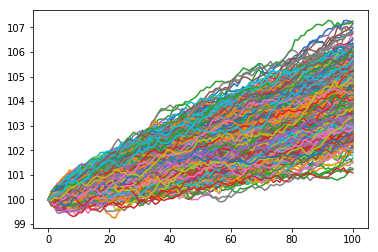

In [18]:
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = 100 #starting stock price (i.e. last available real stock price)
T = 100 #Number of trading days
mu = 0.04 #Return
vol = 0.01 #Volatility
 
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

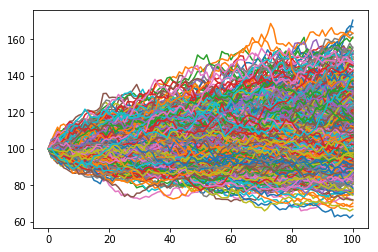

In [19]:
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = 100 #starting stock price (i.e. last available real stock price)
T = 100 #Number of trading days
mu = 0.09 #Return
vol = 0.16 #Volatility
 
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

In [20]:
np.sqrt(1+.16*16)

1.8867962264113207

In [21]:
'''n_años=10
S = 100 #starting stock price (i.e. last available real stock price)
T = 365*n_años #Number of trading days
mu = 0.09 #Return
vol = .16#np.sqrt(1+.16*16) #Volatility

#set up empty list to hold our ending values for each simulated price series
result = []
 
#Define Variables
 
#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):#10000
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    #df=pd.Series(daily_returns)
    #plt.plot(((df).cumprod() - 1))
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
 
#show the plot of multiple price series created above
plt.show()
 
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()'''

'n_años=10\nS = 100 #starting stock price (i.e. last available real stock price)\nT = 365*n_años #Number of trading days\nmu = 0.09 #Return\nvol = .16#np.sqrt(1+.16*16) #Volatility\n\n#set up empty list to hold our ending values for each simulated price series\nresult = []\n \n#Define Variables\n \n#choose number of runs to simulate - I have chosen 10,000\nfor i in range(10000):#10000\n    #create list of daily returns using random normal distribution\n    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1\n    \n    #set starting price and create price series generated by above random daily returns\n    price_list = [S]\n    \n    for x in daily_returns:\n        price_list.append(price_list[-1]*x)\n \n    #plot data from each individual run which we will plot at the end\n    plt.plot(price_list)\n    #df=pd.Series(daily_returns)\n    #plt.plot(((df).cumprod() - 1))\n    \n    #append the ending value of each simulated run to the empty list we created at the beginning\n    resu

In [22]:
'''n_años=10
S = 100 #starting stock price (i.e. last available real stock price)
T = 365*n_años #Number of trading days
mu1 = 0.09 #Return
vol1 = .16#np.sqrt(1+.16*16) #Volatility
mu2 = 0.04 #Return
vol2 = .01#np.sqrt(1+.16*16) #Volatility

#set up empty list to hold our ending values for each simulated price series
result = []
 
#Define Variables
 
#choose number of runs to simulate - I have chosen 10,000
for i in range(1000):#10000
    #create list of daily returns using random normal distribution
    daily_returns1=np.random.normal(mu1/T,vol1/math.sqrt(T),T)+1
    daily_returns2=np.random.normal(mu2/T,vol2/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    #price_list = [S*2]
    price_list1 = [S]
    price_list2 = [S]
    
    for x in daily_returns1:
        price_list1.append(price_list1[-1]*x)
        
    for y in daily_returns2:
        price_list2.append(price_list2[-1]*y)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list1+price_list2)
    #df=pd.Series(daily_returns)
    #plt.plot(((df).cumprod() - 1))
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list1[-1]+price_list2[-1])
 
#show the plot of multiple price series created above
plt.show()
 
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()'''

'n_años=10\nS = 100 #starting stock price (i.e. last available real stock price)\nT = 365*n_años #Number of trading days\nmu1 = 0.09 #Return\nvol1 = .16#np.sqrt(1+.16*16) #Volatility\nmu2 = 0.04 #Return\nvol2 = .01#np.sqrt(1+.16*16) #Volatility\n\n#set up empty list to hold our ending values for each simulated price series\nresult = []\n \n#Define Variables\n \n#choose number of runs to simulate - I have chosen 10,000\nfor i in range(1000):#10000\n    #create list of daily returns using random normal distribution\n    daily_returns1=np.random.normal(mu1/T,vol1/math.sqrt(T),T)+1\n    daily_returns2=np.random.normal(mu2/T,vol2/math.sqrt(T),T)+1\n    \n    #set starting price and create price series generated by above random daily returns\n    #price_list = [S*2]\n    price_list1 = [S]\n    price_list2 = [S]\n    \n    for x in daily_returns1:\n        price_list1.append(price_list1[-1]*x)\n        \n    for y in daily_returns2:\n        price_list2.append(price_list2[-1]*y)\n \n    #plot

In [23]:
#use numpy mean function to calculate the mean of the result
#print(round(np.mean(result),2))

In [24]:
#print("5% quantile =",np.percentile(result,5)) # 5% de probabilidad de que el precio termine por debajo de 102.33
#print("95% quantile =",np.percentile(result,95)) # 5% de probabilidad de que termine por arriba de 105.80

In [25]:
#plt.hist(result,bins=100)
#plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
#plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
#plt.show()